In [265]:
#alle libraries uploaden
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
sns.set();
from tqdm import tqdm   #progressbar
tqdm.pandas()   #progressbar instantiëren voor pandas
import scipy
from scipy.stats import linregress, ttest_ind, t
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.tools import FigureFactory as FF 
from math import sqrt
import statsmodels 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Task switching taak 

Wat hield deze taak in? 
<ul>
    <li>De participanten moesten drie blokken doorlopen. </li>
    <li>Belangrijke is om de prestatie op de enkeltaak-blokken tov de switch-taak-blokken te plaatsen.</li>
    <li>bvb. SC mixed blok, maar ook: proportie  = gemiddeldeRT M/(gemiddeldRT A + gemiddeldRT W)</li>
    
</ul>

In [4]:
df_TST = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/ppndata/CLEAN TST/TST_original.xlsx')
list(df_TST)

['ppn',
 'Geslacht',
 'leeftijd',
 'IQ',
 'outliersTST',
 'restingdpTST',
 'TST_mean_RT_TOT',
 'TST_mean_RT_TOT_congruent',
 'TST_mean_RT_TOT_incongruent',
 'TST_CE_RT_TOT',
 'TST_mean_RT_A',
 'TST_mean_RT_A_congruent',
 'TST_mean_RT_A_incongruent',
 'TST_CE_RT_A',
 'TST_mean_RT_W',
 'TST_mean_RT_W_congruent',
 'TST_mean_RT_W_incongruent',
 'TST_CE_RT_W',
 'TST_mean_RT_M',
 'TST_mean_RT_M_congruent',
 'TST_mean_RT_M_incongruent',
 'TST_CE_RT_M',
 'TST_mean_RT_S_M',
 'TST_mean_RT_NS_M',
 'TST_SC_RT_M',
 'TST_incongr_RT_S_M',
 'TST_incongr_RT_NS_M',
 'TST_congr_RT_S_M',
 'TST_congr_RT_NS_M',
 'TST_CE_RT_SC_M',
 'TST_mean_RT_NM',
 'Prop_RT_SC',
 'TST_TOTaantalcorrect',
 'TST_TOTaantalfout',
 'TST_TOTACC_prop',
 'TST_TOT_aantalcorrect_congr',
 'TST_TOT_aantalfout_congr',
 'TST_TOT_ACC_prop_congr',
 'TST_TOT_aantalcorrect_incongr',
 'TST_TOT_aantalfout_incongr',
 'TST_TOT_ACC_prop_incongr',
 'TST_TOT_ACC_congrE',
 'TST_A_aantalcorrect',
 'TST_A_aantalfout',
 'TST_A_ACC_prop',
 'TST_A_aantal

## Reactietijden 

In [290]:
df_TOT = df_TST[['TST_mean_RT_TOT',
 'TST_mean_RT_TOT_congruent',
 'TST_mean_RT_TOT_incongruent',
 'TST_CE_RT_TOT']]


In [288]:
df_A = df_TST[['TST_mean_RT_A',
 'TST_mean_RT_A_congruent',
 'TST_mean_RT_A_incongruent',
 'TST_CE_RT_A']]

In [291]:
df_W = df_TST[[ 'TST_mean_RT_W',
 'TST_mean_RT_W_congruent',
 'TST_mean_RT_W_incongruent',
 'TST_CE_RT_W']]

In [292]:
df_M = df_TST[[ 'TST_mean_RT_M',
 'TST_mean_RT_M_congruent',
 'TST_mean_RT_M_incongruent',
 'TST_CE_RT_M',
 'TST_mean_RT_S_M',
 'TST_mean_RT_NS_M',
 'TST_SC_RT_M',
 'TST_incongr_RT_S_M',
 'TST_incongr_RT_NS_M',
 'TST_congr_RT_S_M',
 'TST_congr_RT_NS_M',
 'TST_CE_RT_SC_M']]

### Totaal

#### Beschrijvend overzicht vd verschillende kolommen (over alle blokken heen)

In [293]:
df_TOT.describe()

,TST_mean_RT_TOT,TST_mean_RT_TOT_congruent,TST_mean_RT_TOT_incongruent,TST_CE_RT_TOT
count,40.000000,40.000000,40.000000,40.000000
mean,742.133025,726.803275,759.653120,32.849845
std,176.001934,172.396951,183.871245,48.392588
min,468.142504,465.139828,471.246966,-129.193607
25%,618.174601,611.184627,635.664874,4.822621
50%,703.205744,697.467368,719.875431,29.715976
75%,814.276342,813.409950,852.194186,57.142653
max,1180.563425,1163.477661,1214.260089,137.641906


De verschillende kolommen visualiseren 

In [297]:
x=df_TOT[["TST_mean_RT_TOT"]]
y=df_TOT[["TST_mean_RT_TOT_congruent"]]
z=df_TOT[["TST_mean_RT_TOT_incongruent"]]
a=df_TOT[["TST_CE_RT_TOT"]]

In [299]:
TOT_mean = 742.133
TOT_mean_cong = 726.80
TOT_mean_incong = 759.653
TOT_CE = 32.849

#### Gemiddelde RT over de blokken en congruentie heen: Algemeen gemiddelde

##### Via histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



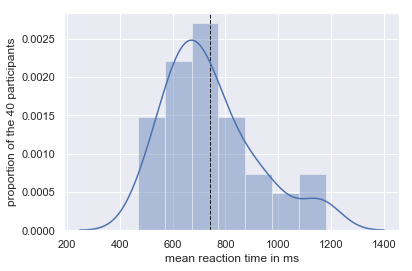

In [300]:
plt.axvline(TOT_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(x)

##### Via boxplot

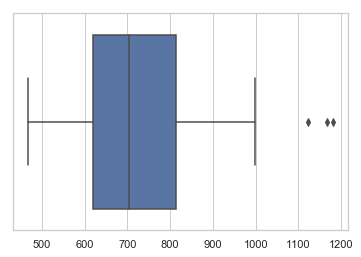

In [301]:
sns.set(style="whitegrid")
sns.boxplot(x=x)

Drie outliers

#### Gemiddelde RT over de blokken heen: congruente <=> incongruente trials

In [314]:
TST_congruency = pd.concat([y,z])
TST_congruency = TST_congruency.reset_index()

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




##### Via histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



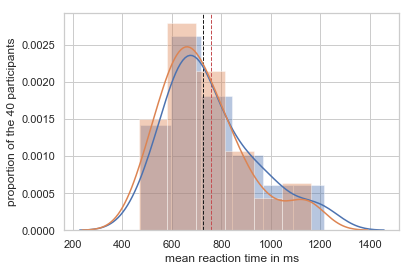

In [304]:
plt.axvline(TOT_mean_cong, color='k', linestyle='dashed', linewidth=1)
plt.axvline(TOT_mean_incong, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(z)
sns.distplot(y)

Behoorlijke sterke overlap in de verdeling. t-test zal moeten aantonen of dit minimale verschil significant is of niet. 

##### Via boxplot

Dit is enkel mogelijk vanuit long format, dus kolommen: (1) ppn, (2) mean RT, (3) congruentie

In [315]:
TST_congruency_long = pd.melt(TST_congruency, id_vars=["index"], var_name="congruency", value_name = "mean_RT")

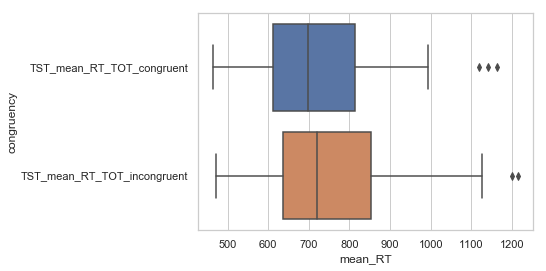

In [317]:
sns.boxplot(x="mean_RT", y="congruency", data=TST_congruency_long)

Ziet er niet naar uit dat er over alle blokken heen een congruentie-effect zal zijn. Je ziet wel dat er in totaal 3 outliers zijn. 

Wat is het verschil tussen beide gemiddeldes? 

In [320]:
diff_mean = TOT_mean_incong - TOT_mean_cong
diff_mean

32.853000000000065

Is deze waarde voldoende groot om door een t-test als een significant verschil gezien te worden? 

##### t-test: significant verschil in gemiddelde RT tussen congruente en incongruente trials?

In [322]:
ttest_ind(df_TOT["TST_mean_RT_TOT_incongruent"],df_TOT["TST_mean_RT_TOT_congruent"])

Ttest_indResult(statistic=0.824282606327725, pvalue=0.41229250893921665)

Er is <b> geen significant verschil </b> in gemiddelde tussen congruente en incongruente trials over alle blokken heen (ongeacht switching factor).

##### Via joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



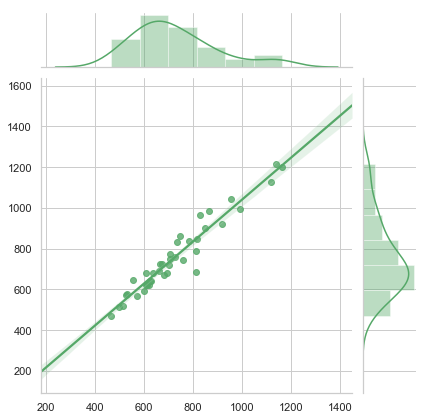

In [323]:
sns.jointplot(x=y, y=z, kind='reg', color='g')

x-as = congruent, y = as = incongruent. 

##### correlatietest: indien je trager scoort op congruente trials, scoor je dan ook gemiddeld trager op incongruente trials? 

In [324]:
linregress(df_TOT["TST_mean_RT_TOT_incongruent"],df_TOT["TST_mean_RT_TOT_congruent"])

LinregressResult(slope=0.9049093748056573, intercept=39.38604522493654, rvalue=0.9651377934174215, pvalue=1.0069703676093643e-23, stderr=0.039810525190227555)

Sterk significant positief verband: als je dus trager scoort op de congruente trials, zal je ook trager scoren op de incongruente trials. 

#### Gemiddelde verschil in RT over de blokken heen: congruente <=> incongruente trials = Congruency effects

##### Via histogram 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



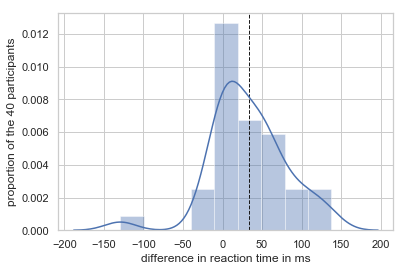

In [326]:
plt.axvline(TOT_CE, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('difference in reaction time in ms')
sns.distplot(a)

Enkele participanten hebben een algemene congruentie-score < 0. Dit betekent dus dat zij gemiddeld in het algemeen trager reageerden op de congruente trials dan op de incongruente trials. 

De meeste participanten vertonen een erg klein congruentie-effect (niet-significant waarschijnlijk obv vorige t-test).

##### Via boxplot

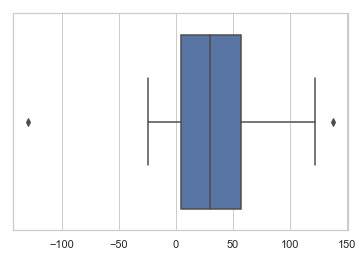

In [327]:
sns.set(style="whitegrid")
sns.boxplot(x=a)

Twee outliers in congruentie-effecten. 

Die congruentie-effecten zijn niet cruciaal maar wel interessant om eens in rekening te brengen; aangezien dit ook zou kunnen verklaren waarom er een verschil is tussen switch en non-switch trials bvb. 

### non-switch blokken

#### Beschrijvend overzicht

In [294]:
df_A.describe()

,TST_mean_RT_A,TST_mean_RT_A_congruent,TST_mean_RT_A_incongruent,TST_CE_RT_A
count,40.000000,40.000000,40.000000,40.000000
mean,626.783264,613.292965,667.849064,54.556100
std,134.074481,147.447130,227.338568,182.600084
min,449.588587,272.841750,451.218333,-239.423968
25%,540.083903,528.673276,550.136279,-3.218372
50%,579.964309,571.000645,606.089114,32.069325
75%,705.141219,682.612110,737.944749,58.096631
max,1039.408946,1119.216935,1869.560750,1050.515523


In [295]:
df_W.describe()

,TST_mean_RT_W,TST_mean_RT_W_congruent,TST_mean_RT_W_incongruent,TST_CE_RT_W
count,40.000000,40.000000,40.000000,40.000000
mean,619.911102,613.292965,629.768774,16.475809
std,142.211989,147.447130,149.886176,73.533614
min,392.971500,272.841750,403.678419,-193.238757
25%,529.958104,528.673276,533.101552,-11.081563
50%,570.911021,571.000645,587.044100,10.354629
75%,694.612010,682.612110,709.591194,42.394820
max,1135.574094,1119.216935,1179.667304,240.259500


Hier alles overlappend visualiseren (W en A samen)

In [329]:
x=df_A[["TST_mean_RT_A"]]
y=df_A[["TST_mean_RT_A_congruent"]]
z=df_A[["TST_mean_RT_A_incongruent"]]
a=df_A[["TST_CE_RT_A"]]

xx=df_W[["TST_mean_RT_W"]]
yy=df_W[["TST_mean_RT_W_congruent"]]
zz=df_W[["TST_mean_RT_W_incongruent"]]
aa=df_W[["TST_CE_RT_W"]]

In [330]:
A_mean = 626.783264
A_mean_cong = 613.292965
A_mean_incong = 667.849064
A_CE = 54.556100

W_mean = 619.911102
W_mean_cong = 613.292965
W_mean_incong = 629.768774
W_CE = 16.475809

<b> Opmerking!! </b> heel vreemd dat de kolom van RT_A_congruent volledig gelijk is aan RT_W_congruent

#### Gemiddelde RT van de non-switch blokken over de congruentie heen

In [354]:
TST_TOT = pd.concat([x, xx], axis=1)
TST_TOT

,TST_mean_RT_A,TST_mean_RT_W
0,779.357578,808.046719
1,558.977282,533.736563
2,508.787362,497.892319
3,685.024609,690.778021
4,639.048978,626.906333
5,489.365146,483.855126
6,702.428065,663.565198
7,600.801591,655.032977
8,476.416333,392.971500
9,904.892587,893.257130


##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



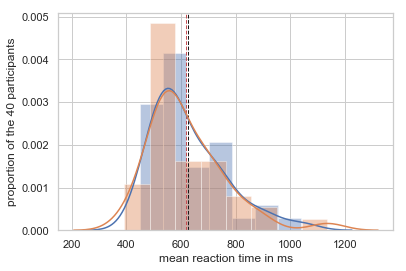

In [334]:
plt.axvline(A_mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(W_mean, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(x)
sns.distplot(xx)

Hier wordt dus in het blauw blok A aangeduid en in het oranje blok W. Het is duidelijk zichtbaar dat de gemiddelde reactietijden niet sterk verschillen van elkaar. 

##### boxplot

In [358]:
TST_TOT_long = pd.melt(TST_TOT, var_name="blok", value_name="mean_RT")

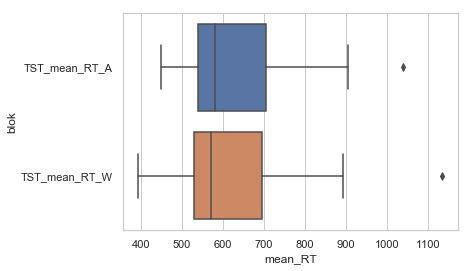

In [359]:
sns.boxplot(x="mean_RT", y="blok", data=TST_TOT_long)

Beiden hebben een sterk gelijkaardige verdeling en elk 1 outlier. Het ziet er naar uit dat er geen significant verschil is tussen de gemiddelde RT (over congruentie heen) tussen blok A en W. Zo'n boxplot kan dan ook nog gemaakt worden met M. Deze zal waarschijnlijk wel al verschillen op het totaal niveau. 

##### diff_mean

In [362]:
diff_mean = A_mean - W_mean
diff_mean

6.872162000000003

minimaal verschil. 

##### t-test

In [364]:
ttest_ind(TST_TOT["TST_mean_RT_A"],TST_TOT["TST_mean_RT_W"])

Ttest_indResult(statistic=0.22237733365331952, pvalue=0.8246014109970873)

t-waarde: 0.22237733; heel kleine t-waarde => niet-significant verschil: p = 0.8246 (> 0.05)

##### Joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



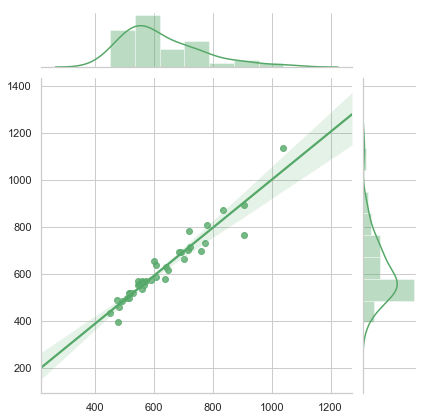

In [365]:
sns.jointplot(x=x, y=xx, kind='reg', color='g')

x = TST_mean_RT_A en xx = TST_mean_RT_W. Toont een positief verband; namelijk als je trager reageert op de trials in blok A, zal je ook trager reageren op de trials in blok W. 

##### correlatietest

In [367]:
linregress(TST_TOT["TST_mean_RT_A"],TST_TOT["TST_mean_RT_W"])

LinregressResult(slope=1.0191620852287864, intercept=-18.882637066209895, rvalue=0.9608446423340143, pvalue=8.812374031298013e-23, stderr=0.047677719932925196)

Deze correlatie is sterk significant. r = 0.9608; p  <0.0001. 

#### Gemiddelde RT van de non-switch blokken: congruente <=> incongruente trials 

In [373]:
TST_switch_congruency = pd.concat([y,z,yy,zz],  axis=1)

y en z = blok A (A_mean_cong; A_mean_incong), yy en zz = blok W (W_mean_cong; W_mean_incong). 

In [374]:
TST_switch_congruency

,TST_mean_RT_A_congruent,TST_mean_RT_A_incongruent,TST_mean_RT_W_congruent,TST_mean_RT_W_incongruent
0,801.187288,737.810710,801.187288,821.536933
1,533.075061,602.743103,533.075061,535.897467
2,500.604032,524.642563,500.604032,492.638375
3,678.756935,697.977800,678.756935,714.068875
4,632.400951,652.130581,632.400951,615.348690
5,473.490172,527.729667,473.490172,504.585034
6,656.290033,793.215806,656.290033,678.358033
7,620.128719,565.264613,620.128719,721.351067
8,272.841750,639.276000,272.841750,513.101250
9,904.678705,905.313452,904.678705,870.782419


##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



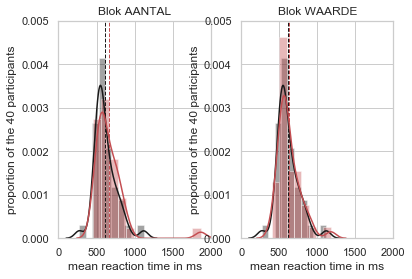

In [382]:

plt.subplot(1, 2, 1)
plt.axvline(A_mean_cong, color='k', linestyle='dashed', linewidth=1)
plt.axvline(A_mean_incong, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.ylim([0.0, 0.005])
plt.xlabel('mean reaction time in ms')
plt.xlim([0, 2000])
plt.title('Blok AANTAL')
sns.distplot(y, color='k')
sns.distplot(z, color = 'r')

plt.subplot(1, 2, 2)
plt.axvline(W_mean_cong, color='k', linestyle='dashed', linewidth=1)
plt.axvline(W_mean_incong, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.ylim([0.0, 0.005])
plt.xlabel('mean reaction time in ms')
plt.xlim([0, 2000])
plt.title('Blok WAARDE')
sns.distplot(yy, color= 'k')
sns.distplot(zz, color= 'r')


rood = incongruent, zwart = congruent. 
Hier mag wat meer ruimte tussen de twee subplots komen. 

##### boxplot

Hier zou je dus vier boxplots moeten uitkomen; misschien interessanter nu om de boxplotten (congruent en incongruent) van het zelfde blok naast elkaar te zetten. Bvb met een violinplot. 

In [ ]:
We zullen het nu vanuit wide data doen; zodat niet altijd de omzetting moet gebeuren van wide naar long. 

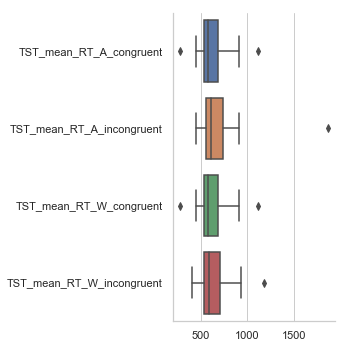

In [383]:
sns.catplot(data=TST_switch_congruency, orient="h", kind="box")

##### diff_mean

In [ ]:
A_mean_cong = 613.292965
A_mean_incong = 667.849064

W_mean_cong = 613.292965
W_mean_incong = 629.768774


In [385]:
diff_mean_A = A_mean_incong - A_mean_cong
diff_mean_W = W_mean_incong - W_mean_cong
diff_A_W_congr = A_mean_cong - W_mean_cong
diff_A_W_incongr = A_mean_incong - W_mean_incong
diff_Acon_Wincon = A_mean_cong - W_mean_incong
diff_Aincon_Wcon = A_mean_incong - W_mean_cong

In [386]:
diff_mean_A

54.55609900000002

In [387]:
diff_mean_W

16.475809000000027

In [388]:
diff_A_W_congr

0.0

maar dit zou het resultaat kunnen zijn van een fout? 

In [389]:
diff_A_W_incongr

38.08028999999999

In [390]:
diff_Acon_Wincon

-16.475809000000027

In [391]:
diff_Aincon_Wcon

54.55609900000002

Deze kunnen nu gecontroleerd worden via t-testen. 

##### t-test

In [ ]:
	TST_mean_RT_A_congruent	TST_mean_RT_A_incongruent	TST_mean_RT_W_congruent	TST_mean_RT_W_incongruent

###### A incon <=> A con 

In [393]:
ttest_ind(TST_switch_congruency["TST_mean_RT_A_incongruent"], TST_switch_congruency["TST_mean_RT_A_congruent"])

Ttest_indResult(statistic=1.2733735509236235, pvalue=0.20666735621802385)

niet significant. 

###### W incon <=> W con 

In [394]:
ttest_ind(TST_switch_congruency["TST_mean_RT_W_incongruent"], TST_switch_congruency["TST_mean_RT_W_congruent"])

Ttest_indResult(statistic=0.49560260260681666, pvalue=0.6215682983638642)

niet significant.

###### A con <=> W con

In [395]:
ttest_ind(TST_switch_congruency["TST_mean_RT_A_congruent"], TST_switch_congruency["TST_mean_RT_W_congruent"])

Ttest_indResult(statistic=0.0, pvalue=1.0)

niet significant. 

###### A incon <=> W incon

In [396]:
ttest_ind(TST_switch_congruency["TST_mean_RT_W_incongruent"], TST_switch_congruency["TST_mean_RT_A_incongruent"])

Ttest_indResult(statistic=-0.8844606272228752, pvalue=0.3791658805624767)

niet significant. 

###### A con <=> W incon

In [397]:
ttest_ind(TST_switch_congruency["TST_mean_RT_W_incongruent"], TST_switch_congruency["TST_mean_RT_A_congruent"])

Ttest_indResult(statistic=0.49560260260681666, pvalue=0.6215682983638642)

niet significant. 

###### A incon <=> W con 

In [399]:
ttest_ind(TST_switch_congruency["TST_mean_RT_A_incongruent"], TST_switch_congruency["TST_mean_RT_W_congruent"])

Ttest_indResult(statistic=1.2733735509236235, pvalue=0.20666735621802385)

niet significant. 

##### joint plot

In [ ]:
y=df_A[["TST_mean_RT_A_congruent"]]
z=df_A[["TST_mean_RT_A_incongruent"]]
yy=df_W[["TST_mean_RT_W_congruent"]]
zz=df_W[["TST_mean_RT_W_incongruent"]]

Zijn er van deze correlates significant? 

###### A congr <=> A incongr

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



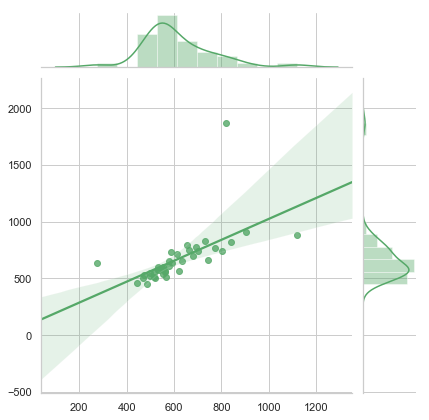

In [406]:
sns.jointplot(x=y, y=z, kind='reg', color='g')

In [414]:
linregress(df_A["TST_mean_RT_A_incongruent"],df_A["TST_mean_RT_A_congruent"])

LinregressResult(slope=0.3877563811435602, intercept=354.3302284067589, rvalue=0.5978548432397793, pvalue=4.6270194620171076e-05, stderr=0.0843395901893034)

Significante positieve correlatie: Als een participant trager reageerde op de congruente trials in blok A, reageerde ze ook trager op de incongruente trials in blok A. 

###### W congr <=> W incongr

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



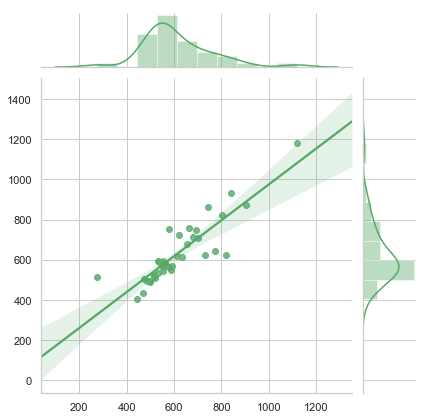

In [407]:
sns.jointplot(x=yy, y=zz, kind='reg', color='g')

In [415]:
linregress(df_W["TST_mean_RT_W_incongruent"],df_W["TST_mean_RT_W_congruent"])

LinregressResult(slope=0.8635173441495876, intercept=69.47670559847097, rvalue=0.8778015058169824, pvalue=1.0380348071882712e-13, stderr=0.07644352650609212)

Eveneens een significant positief verband. 

###### A congr <=> W congr 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



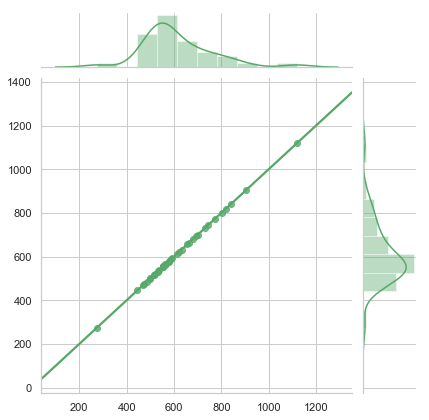

In [408]:
sns.jointplot(x=y, y=yy, kind='reg', color='g')

In [416]:
linregress(df_A["TST_mean_RT_A_congruent"],df_W["TST_mean_RT_W_congruent"])

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)

Fout? 

###### A incongr <=> W incongr

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



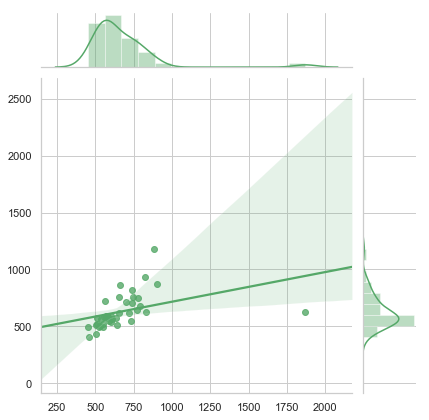

In [409]:
sns.jointplot(x=z, y=zz, kind='reg', color='g')

In [418]:
linregress(df_A["TST_mean_RT_A_incongruent"],df_W["TST_mean_RT_W_incongruent"])

LinregressResult(slope=0.26074106659802165, intercept=455.63309664163717, rvalue=0.39547677094692946, pvalue=0.011543062915286983, stderr=0.09823459578944693)

Significant positief verband, dus als je trager reageert op de incongruente trials in het AANTAL blok, zal je dat ook doen op de incongruente trials in het WAARDE blok. 

###### A congr <=> W incongr 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



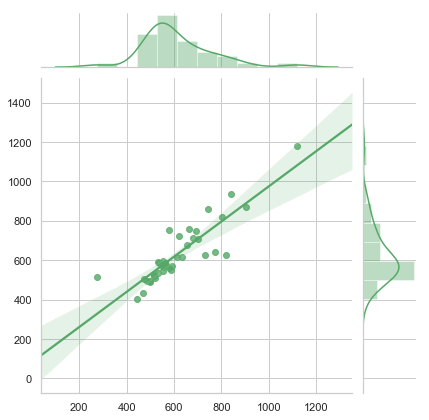

In [410]:
sns.jointplot(x=y, y=zz, kind='reg', color='g')

In [419]:
linregress(df_A["TST_mean_RT_A_congruent"],df_W["TST_mean_RT_W_incongruent"])

LinregressResult(slope=0.8923219537337762, intercept=82.51399748639835, rvalue=0.8778015058169824, pvalue=1.0380348071882712e-13, stderr=0.07899347637237428)

Positief significant verband, namelijk als je trager reageert op de congruente trials in het AANTAL blok, zal je dat ook doen op de incongruente trials in het WAARDE blok. 

###### A incongr <=> W congr

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



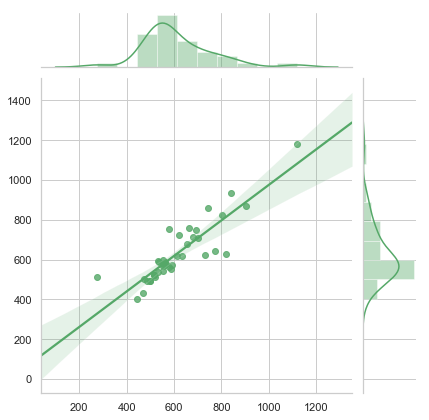

In [411]:
sns.jointplot(x=yy, y=zz, kind='reg', color='g')

In [420]:
linregress(df_A["TST_mean_RT_A_incongruent"],df_W["TST_mean_RT_W_congruent"])

LinregressResult(slope=0.3877563811435602, intercept=354.3302284067589, rvalue=0.5978548432397793, pvalue=4.6270194620171076e-05, stderr=0.0843395901893034)

Opnieuw een significant positief verband: als je trager reageert op incongruente trials in blok AANTAl, reageerde je ook trager op congruente trials in blok WAARDE. 

#### Gemiddelde verschil in RT: congruente <=> incongruente trials = congruency effects

Vergelijking van de congruentie-effecten van blok AANTAL tov congruentie-effecten van blok WAARDE:
    <ul>
        <li>histogram</li>
        <li>boxplot: significant verschil tussen het gemiddelde congruentie-effect? </li>
        <li>joint plot: significante correlatie tussen de congruentie-effecten van beide blokken?</li>
        </ul>

In [425]:
TST_congruency = pd.concat([df_A["TST_CE_RT_A"], df_W["TST_CE_RT_W"]], axis=1)

In [426]:
TST_congruency.describe()

,TST_CE_RT_A,TST_CE_RT_W
count,40.000000,40.000000
mean,54.556100,16.475809
std,182.600084,73.533614
min,-239.423968,-193.238757
25%,-3.218372,-11.081563
50%,32.069325,10.354629
75%,58.096631,42.394820
max,1050.515523,240.259500


In [427]:
CE_A = 54.5561
CE_W = 16.475809

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



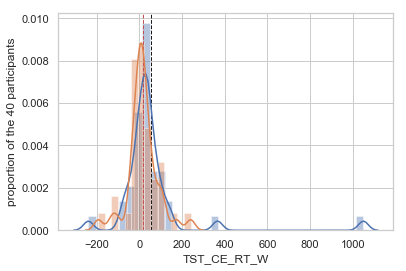

In [428]:
plt.axvline(CE_A, color='k', linestyle='dashed', linewidth=1)
plt.axvline(CE_W, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('diff in mean reaction time in ms')
sns.distplot(TST_congruency["TST_CE_RT_A"])
sns.distplot(TST_congruency["TST_CE_RT_W"])

##### Boxplot

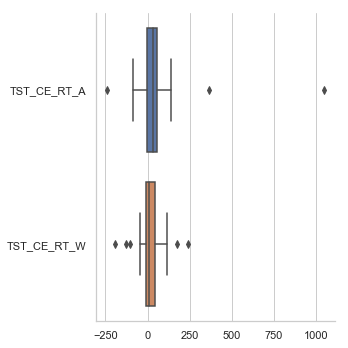

In [429]:
sns.catplot(data=TST_congruency, orient="h", kind="box")

TST_CE_RT_A vertoont 3 outliers, terwijl TST_CE_RT_W er 5 vertoont. Het gemiddelde lijkt niet extreem sterk van elkaar te verschillen. 

##### t-test

In [430]:
ttest_ind(TST_congruency["TST_CE_RT_A"],TST_congruency["TST_CE_RT_W"])

Ttest_indResult(statistic=1.2234732798492456, pvalue=0.22483425396259066)

Er is geen verschil in congruentie-effecten tussen blok A en blok W. p = 0.22483. 

##### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



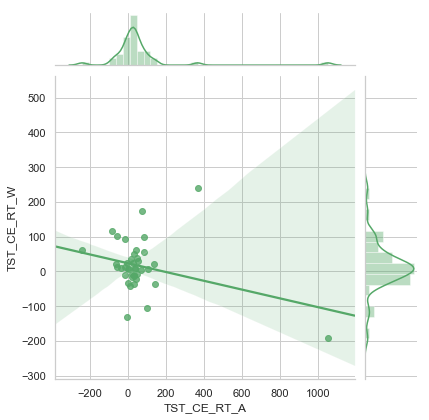

In [431]:
sns.jointplot(x=TST_congruency["TST_CE_RT_A"], y=TST_congruency["TST_CE_RT_W"], kind='reg', color='g')

##### correlatie

In [432]:
linregress(TST_congruency["TST_CE_RT_A"],TST_congruency["TST_CE_RT_W"])

LinregressResult(slope=-0.12666962759071534, intercept=23.386410074350835, rvalue=-0.314548454275, pvalue=0.04806510101725167, stderr=0.0620111548693185)

een licht significant negatief verband? 

### switch blok

#### onderzoek van mixed blok

In [437]:
Mixed = df_TST[['TST_mean_RT_M',
 'TST_mean_RT_M_congruent',
 'TST_mean_RT_M_incongruent',
 'TST_CE_RT_M','TST_mean_RT_S_M',
 'TST_mean_RT_NS_M',
 'TST_SC_RT_M',
 'TST_incongr_RT_S_M',
 'TST_incongr_RT_NS_M',
 'TST_congr_RT_S_M',
 'TST_congr_RT_NS_M',
 'TST_CE_RT_SC_M']]

In [438]:
Mixed.describe()

,TST_mean_RT_M,TST_mean_RT_M_congruent,TST_mean_RT_M_incongruent,TST_CE_RT_M,TST_mean_RT_S_M,TST_mean_RT_NS_M,TST_SC_RT_M,TST_incongr_RT_S_M,TST_incongr_RT_NS_M,TST_congr_RT_S_M,TST_congr_RT_NS_M,TST_CE_RT_SC_M
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,866.740053,844.416548,892.757827,48.341279,1105.299753,793.899776,311.399977,1176.265442,815.416594,1048.109938,777.897838,90.636748
std,238.845653,248.154340,245.249177,119.907838,314.717191,226.767635,175.871123,358.339182,224.255735,296.648371,258.463427,210.282707
min,499.812137,485.739288,514.127621,-488.738750,642.494571,456.256556,-3.534968,714.998923,458.115631,577.923133,454.312977,-310.377223
25%,682.638254,677.985171,698.065649,-5.380681,884.529111,648.343775,204.028043,924.753886,649.326985,856.073696,626.851398,1.122307
50%,828.278077,794.712221,846.491369,43.668903,1016.130631,757.719029,302.142926,1063.159000,783.516978,975.973938,723.999604,76.498075
75%,1022.618778,935.794102,1033.696404,102.221952,1344.313444,933.067110,402.181936,1394.100084,948.270671,1201.240059,839.723252,133.435328
max,1589.015714,1614.541119,1560.600642,288.489088,1971.579118,1589.867894,754.006780,2375.477125,1522.332220,1856.799467,1652.798864,994.539088


##### Gemiddelde RT van MIXED over congruentie en switching heen: <b>TST_mean_RT_M</b>

###### histogram

In [445]:
mean_M = 866.740053

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



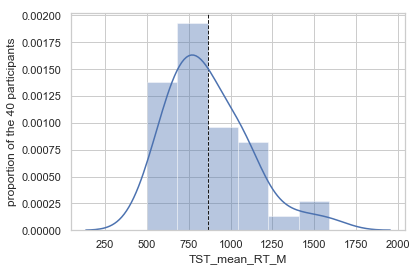

In [447]:
plt.axvline(mean_M, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(Mixed["TST_mean_RT_M"])

###### boxplot

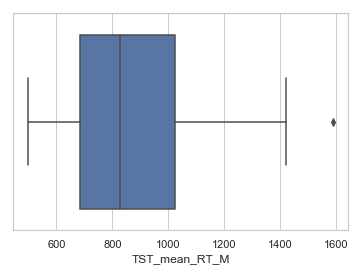

In [449]:
sns.boxplot(x=Mixed["TST_mean_RT_M"])

1 outlier

##### Gemiddelde RT van MIXED over switching heen: <b>TST_mean_RT_M_congruent, TST_mean_RT_M_incongruent</b>

###### histogram

In [450]:
mean_M_con = 844.416548
mean_M_incon = 892.757827

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



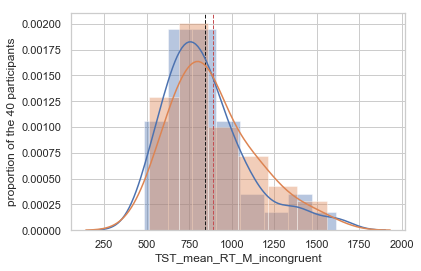

In [451]:
plt.axvline(mean_M_con, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean_M_incon, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(Mixed["TST_mean_RT_M_congruent"])
sns.distplot(Mixed["TST_mean_RT_M_incongruent"])

###### boxplot

In [452]:
con_incon = Mixed[["TST_mean_RT_M_congruent","TST_mean_RT_M_incongruent"]]

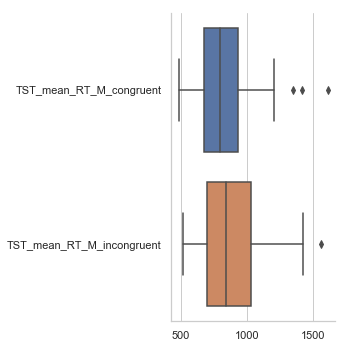

In [453]:
sns.catplot(data=con_incon, orient="h", kind="box")

Bij de congruente trials in de mixed blok zijn er 3 outliers, bij de incongruente trials ind e mixed blok is er 1 outlier. 

###### t-test

In [454]:
ttest_ind(Mixed["TST_mean_RT_M_congruent"],Mixed["TST_mean_RT_M_incongruent"])

Ttest_indResult(statistic=-0.8763011022537873, pvalue=0.3835571688912278)

Er is geen significant verschil in gemiddelde Reactie snelheid tussen congruente en incongruente trials in de Mixed blok. 

###### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



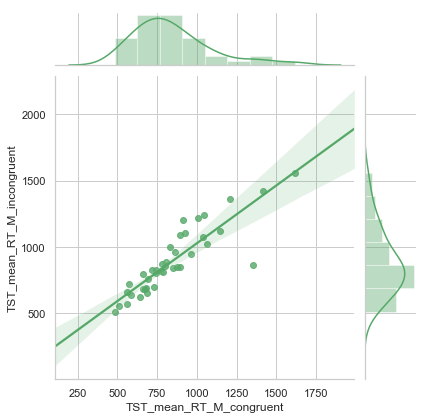

In [456]:
sns.jointplot(x=Mixed["TST_mean_RT_M_congruent"], y=Mixed["TST_mean_RT_M_incongruent"], kind='reg', color='g')

###### correlatie

In [457]:
linregress(Mixed["TST_mean_RT_M_congruent"],Mixed["TST_mean_RT_M_incongruent"])

LinregressResult(slope=0.871620988854231, intercept=156.7466401530828, rvalue=0.8819460005792775, pvalue=5.594589289150446e-14, stderr=0.07556798072087434)

<b>Significante positieve correlatie:</b> indien je trager bent op de congruente trials in het mixed blok, zal je ook trager zijn op de incongruente trials in het mixed blok. 

##### Gemiddelde verschil in RT van mixed over switching heen: <b>TST_CE_RT_M</b>

###### histogram

In [442]:
mean_CE_M = 48.341279

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



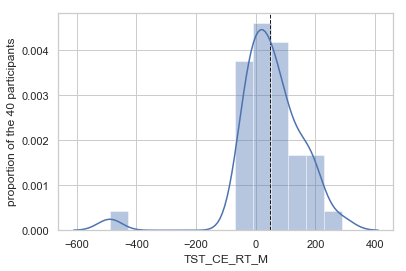

In [459]:
plt.axvline(mean_CE_M, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('diff in mean reaction time in ms')
sns.distplot(Mixed["TST_CE_RT_M"])

Een vreemde (negatieve) outlier: geeft aan dat er een participant is waar de congruente trials trager werden gedaan de incongruente trials in de mixed blok. 

###### boxplot

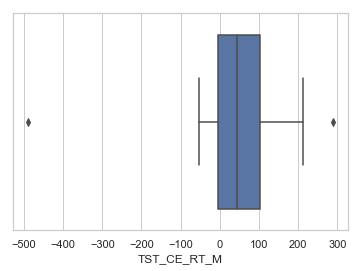

In [460]:
sns.boxplot(x=Mixed["TST_CE_RT_M"])

Twee outliers: een heel belangrijke op -500 negatief en een positieve. 

##### Gemiddelde RT van mixed over de congruentie heen: <b>TST_mean_RT_NS_M, TST_mean_RT_S_M</b>

###### histogram

In [461]:
mean_S_M = 1105.299753
mean_NS_M = 793.899776

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



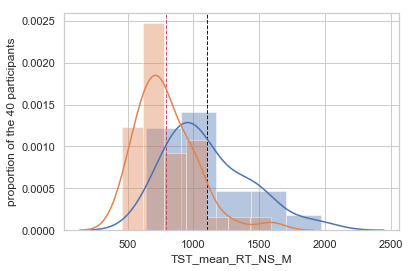

In [464]:
plt.axvline(mean_S_M, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean_NS_M, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(Mixed["TST_mean_RT_S_M"])
sns.distplot(Mixed["TST_mean_RT_NS_M"])

Er is een duidelijk verschil in gemiddelde RT tussen de switch en non-switch trials. De switch trials lijken toch wel wat langer de duren en een andere verdeling te hebben. 

###### boxplot

In [465]:
switch = Mixed[["TST_mean_RT_NS_M","TST_mean_RT_S_M"]]

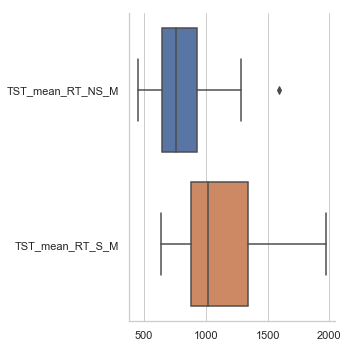

In [466]:
sns.catplot(data=switch, orient="h", kind="box")

1 outlier bij de NS trials van het mixed blok. 
De gemiddelde RT op de switch trials in het mixed blok lijken hoger te liggen. Is dit verschil significant? 

###### t-test

In [467]:
ttest_ind(Mixed["TST_mean_RT_NS_M"],Mixed["TST_mean_RT_S_M"])

Ttest_indResult(statistic=-5.077184354212024, pvalue=2.543382214932309e-06)

t = -5.07718435, p < 0.001. Toont dat er een significant verschil is in de gemiddelden tussen de NS en S trials in het Mixed blok. 

###### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



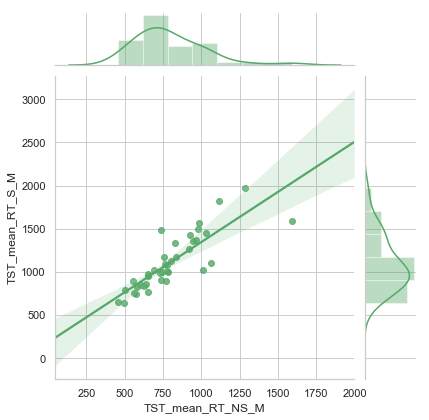

In [468]:
sns.jointplot(x=Mixed["TST_mean_RT_NS_M"],y=Mixed["TST_mean_RT_S_M"], kind='reg',color='g')

###### correlatie

In [469]:
linregress(Mixed["TST_mean_RT_NS_M"],Mixed["TST_mean_RT_S_M"])

LinregressResult(slope=1.16230593882292, intercept=182.54532901170796, rvalue=0.8374927581981711, pvalue=1.616469727027138e-11, stderr=0.12302596374076732)

Dit toont dat er een significant positieve correlatie is: dit wil zeggen dat wanneer iemand gemiddeld trager zal reageren op de non-switch trials, ze ook gemiddeld trager zullen scoren op de switch trials. 

##### Gemiddelde verschil in RT van mixed over de congruentie heen: <b>TST_SC_RT_M</b>

###### histogram

In [470]:
mean_SC_M = 311.399977

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



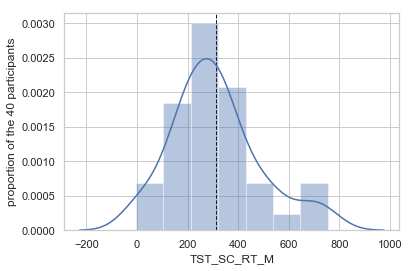

In [471]:
plt.axvline(mean_SC_M, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('diff in mean reaction time in ms')
sns.distplot(Mixed["TST_SC_RT_M"])

Geen waarden kleiner dan 0. Dit toont dus dat elke participant een gemiddeld verschil tussen S en NS trials waarbij het verschil positief is (S RT > NS RT)

###### boxplot

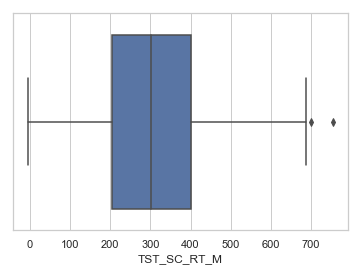

In [472]:
sns.boxplot(x=Mixed["TST_SC_RT_M"])

Twee outliers. Lijken wel geen gigantische te zijn. 

##### Gemiddelde RT van mixed (congruentie x switching):  
<b>'TST_incongr_RT_S_M', 'TST_incongr_RT_NS_M', 'TST_congr_RT_S_M', 'TST_congr_RT_NS_M'</b>

In [ ]:
door het kruisen van congruentie en switching kun je eigenlijk 4 condities vinden. 
Hoofdeffect van Switching? Waarschijnlijk wel
Hoofdeffect van congruentie? Waarschijnlijk niet
Interactie-effect? Waarschijnlijk wel. 

In [496]:
combo = Mixed[["TST_incongr_RT_S_M","TST_incongr_RT_NS_M","TST_congr_RT_S_M","TST_congr_RT_NS_M"]]

In [497]:
combo = combo.reset_index()

In [504]:
combo_long = pd.melt(combo, id_vars=["index"], value_vars=["TST_incongr_RT_S_M","TST_incongr_RT_NS_M","TST_congr_RT_S_M","TST_congr_RT_NS_M"], var_name="cong/switch", value_name = "meanRT")

In [507]:
combo_long = combo_long[["cong/switch", "meanRT"]]

In [ ]:
kolommen aanvullen: snel via Excel

In [509]:
combo_long.to_excel("combo_long.xlsx")

In [511]:
combo_long = pd.read_excel("C:/Users/beheerder/combo_long.xlsx")
combo_long

,cong/switch,meanRT,switch,con
0,TST_incongr_RT_S_M,1481.053500,S,incongr
1,TST_incongr_RT_S_M,895.106182,S,incongr
2,TST_incongr_RT_S_M,838.942308,S,incongr
3,TST_incongr_RT_S_M,925.776333,S,incongr
4,TST_incongr_RT_S_M,1060.372800,S,incongr
5,TST_incongr_RT_S_M,819.353000,S,incongr
6,TST_incongr_RT_S_M,1209.558000,S,incongr
7,TST_incongr_RT_S_M,1039.221917,S,incongr
8,TST_incongr_RT_S_M,960.017000,S,incongr
9,TST_incongr_RT_S_M,1705.456231,S,incongr


###### Histogram

In [443]:
mean_incon_S_M= 1176.265442
mean_incon_NS_M = 815.416594
mean_con_S_M = 1048.109938
mean_con_NS_M = 777.897838

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



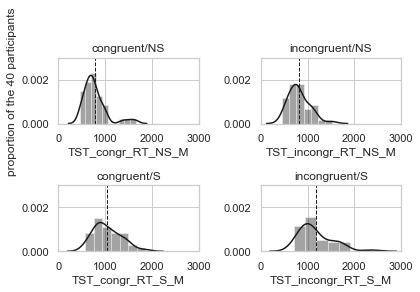

In [479]:
plt.subplot(2, 2, 1)
plt.axvline(mean_con_NS_M, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
plt.ylim([0.0, 0.003])
plt.xlim([0, 3000])
plt.title('congruent/NS')
sns.distplot(Mixed["TST_congr_RT_NS_M"], color='k')

plt.subplot(2, 2, 2)
plt.axvline(mean_incon_NS_M, color='k', linestyle='dashed', linewidth=1)
#plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
plt.ylim([0.0, 0.003])
plt.xlim([0, 3000])
plt.title('incongruent/NS')
sns.distplot(Mixed["TST_incongr_RT_NS_M"], color='k')

plt.subplot(2, 2, 3)
plt.axvline(mean_con_S_M, color='k', linestyle='dashed', linewidth=1)
#plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
plt.ylim([0.0, 0.003])
plt.xlim([0, 3000])
plt.title('congruent/S')
sns.distplot(Mixed["TST_congr_RT_S_M"], color='k')

plt.subplot(2, 2, 4)
plt.axvline(mean_incon_S_M, color='k', linestyle='dashed', linewidth=1)
#plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
plt.ylim([0.0, 0.003])
plt.xlim([0, 3000])
plt.title('incongruent/S')
sns.distplot(Mixed["TST_incongr_RT_S_M"], color='k')

plt.tight_layout()

###### pointplot van de gemiddelden

In [ ]:
Nodig: drie kolommen = (1) congruentie (con <=> incon), (2) switching (S <=> NS), (3) (mean?) RT

In [486]:
long = {'congr': ['incon', 'con', 'incon', 'con'], 
        'switch': ['S','S', 'NS', 'NS'], 
        'mean_RT': [mean_incon_S_M, mean_con_S_M, mean_incon_NS_M, mean_con_NS_M]}
long = pd.DataFrame(long)
long

,congr,switch,mean_RT
0,incon,S,1176.265442
1,con,S,1048.109938
2,incon,NS,815.416594
3,con,NS,777.897838


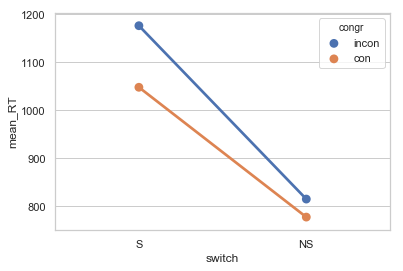

In [487]:
sns.pointplot(x="switch", y="mean_RT", hue="congr", data=long)

Via long format: 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



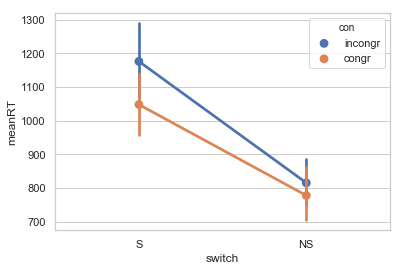

In [512]:
sns.pointplot(x="switch", y="meanRT", hue="con", data=combo_long)

###### boxplot

In [488]:
combo = Mixed[["TST_congr_RT_NS_M","TST_incongr_RT_NS_M","TST_congr_RT_S_M","TST_incongr_RT_S_M"]]

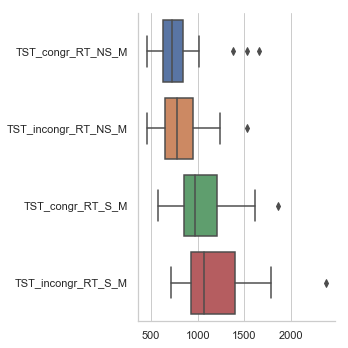

In [489]:
sns.catplot(data=combo, orient="h", kind="box")

###### ANOVA

In [513]:
results = ols('meanRT ~ C(switch) + C(con) + C(switch):C(con)', data=combo_long).fit()

In [520]:
aov_table = anova_lm(results, typ=2)

In [521]:
print(aov_table)

                        sum_sq     df          F        PR(>F)
C(switch)         3.982379e+06    1.0  47.764496  1.155654e-10
C(con)            2.744796e+05    1.0   3.292097  7.153533e-02
C(switch):C(con)  8.215020e+04    1.0   0.985306  3.224294e-01
Residual          1.300655e+07  156.0        NaN           NaN


In [514]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 meanRT   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     17.35
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           9.03e-10
Time:                        10:31:43   Log-Likelihood:                -1131.5
No. Observations:                 160   AIC:                             2271.
Df Residuals:                     156   BIC:                             2283.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          777.8978     45.655     17.039      0.000     687.716     868.080
C(switch)[T.S]                     270.2121     64.566      4.185      0.000     142.676     397.748
C(con)[T.incongr]                   37.5188     64.566      0.581      0.562     -90.018     165.055
C(switch)[T.S]:C(con)[T.incongr]    90.6367     91.310      0.993      0.322     -89.727     271.000
==============================================================================
Omnibus:                       36.333   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.406
Skew:                           1.168   Prob(JB):                     3.42e-13
Kurtosis:                       4.775   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### interpretatie? 

###### Joint plot & correlaties (verschillende combo's)

<b>S_con <=> S_incon</b>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



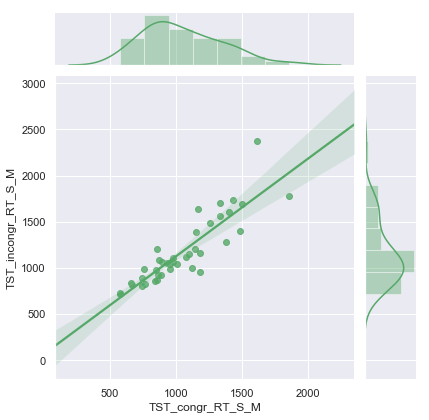

In [523]:
sns.jointplot(x=Mixed["TST_congr_RT_S_M"], y=Mixed["TST_incongr_RT_S_M"], kind='reg', color='g')

In [524]:
linregress(Mixed["TST_congr_RT_S_M"],Mixed["TST_incongr_RT_S_M"])

LinregressResult(slope=1.0606455930297127, intercept=64.59225542485956, rvalue=0.8780474023045524, pvalue=1.0012838167729199e-13, stderr=0.0937798068228498)

<b>S_con <=> NS_con</b>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



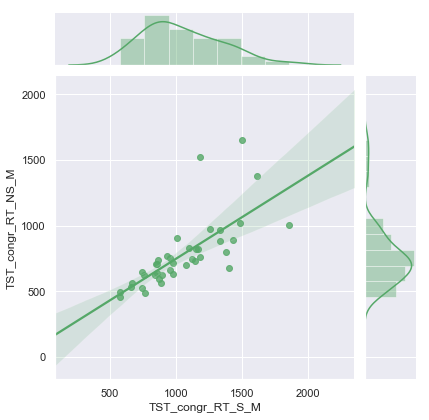

In [525]:
sns.jointplot(x=Mixed["TST_congr_RT_S_M"], y=Mixed["TST_congr_RT_NS_M"], kind='reg', color='g')

In [530]:
linregress(Mixed["TST_congr_RT_S_M"],Mixed["TST_congr_RT_NS_M"])

LinregressResult(slope=0.6336790482475493, intercept=113.73252962449851, rvalue=0.7272977064220248, pvalue=1.0625212490132632e-07, stderr=0.09700482246421412)

<b>S_con <=> NS_incon</b>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



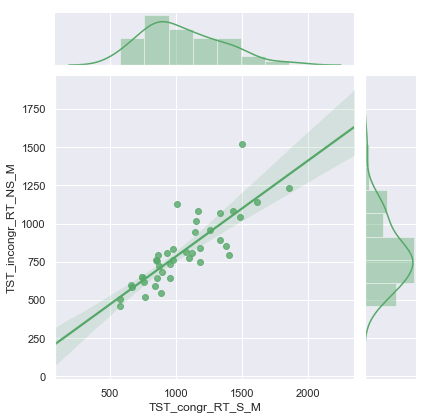

In [526]:
sns.jointplot(x=Mixed["TST_congr_RT_S_M"], y=Mixed["TST_incongr_RT_NS_M"], kind='reg', color='g')

In [531]:
linregress(Mixed["TST_congr_RT_S_M"],Mixed["TST_incongr_RT_NS_M"])

LinregressResult(slope=0.6283703546137485, intercept=156.81538048298899, rvalue=0.831216390671581, pvalue=3.133799438239578e-11, stderr=0.06817807882943748)

<b>S_incon <=> NS_con</b>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



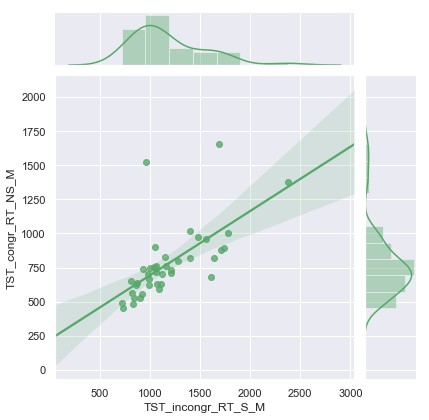

In [527]:
sns.jointplot(x=Mixed["TST_incongr_RT_S_M"], y=Mixed["TST_congr_RT_NS_M"], kind='reg', color='g')

In [532]:
linregress(Mixed["TST_congr_RT_S_M"],Mixed["TST_congr_RT_NS_M"])

LinregressResult(slope=0.6336790482475493, intercept=113.73252962449851, rvalue=0.7272977064220248, pvalue=1.0625212490132632e-07, stderr=0.09700482246421412)

<b>S_incon <=> NS_incon</b>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



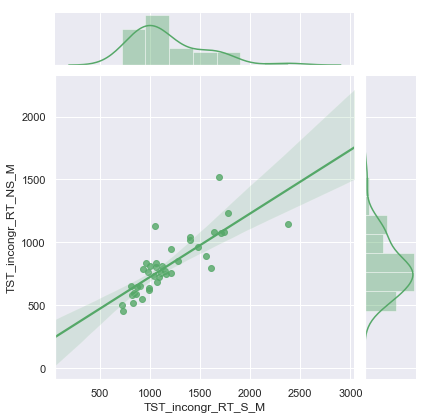

In [528]:
sns.jointplot(x=Mixed["TST_incongr_RT_S_M"], y=Mixed["TST_incongr_RT_NS_M"], kind='reg', color='g')

In [533]:
linregress(Mixed["TST_incongr_RT_S_M"],Mixed["TST_incongr_RT_NS_M"])

LinregressResult(slope=0.5038704460656012, intercept=222.73120088302358, rvalue=0.8051367057145489, pvalue=3.768519732598172e-10, stderr=0.06021123431268133)

<b>NS_con <=> NS_incon</b>

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



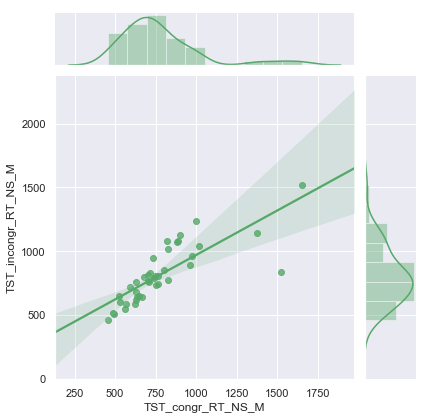

In [529]:
sns.jointplot(x=Mixed["TST_congr_RT_NS_M"], y=Mixed["TST_incongr_RT_NS_M"], kind='reg', color='g')

In [534]:
linregress(Mixed["TST_congr_RT_NS_M"],Mixed["TST_incongr_RT_NS_M"])

LinregressResult(slope=0.6962316724654602, intercept=273.81948147223386, rvalue=0.8024339905714605, pvalue=4.773341504920387e-10, stderr=0.08399210374522495)

##### Gemiddelde verschil in RT van mixed (congruentie x switching):  <b>'TST_CE_RT_SC_M'</b>

###### histogram

In [535]:
mean_CE_SC_M = 90.636748

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



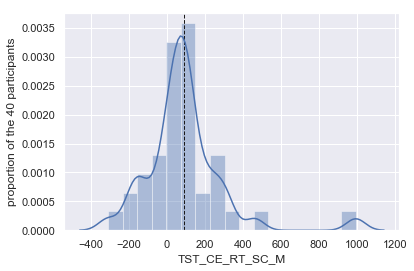

In [538]:
plt.axvline(mean_CE_SC_M, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('diff in mean reaction time in ms')
sns.distplot(Mixed['TST_CE_RT_SC_M'])

Er zijn dus zeker ook participanten die negatieve waarden hebben (dus trager op congruente/NS trials). Maar dit is maar 25% van alle participanten. 

###### boxplot

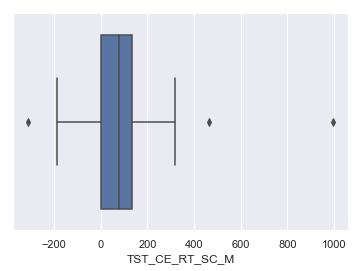

In [536]:
sns.boxplot(x=Mixed['TST_CE_RT_SC_M'])

3 outliers <br>
<b> interpretatie: </b><br>
wat is de kost door incongruentie en switching? 

#### multitasking proportie berekenen: switch tov non-switch (cruciaal)

##### Switching: TST_mean_RT_A (no-switching), TST_mean_RT_W (no-switching), TST_mean_RT_M (switching)

In [543]:
switching = df_TST[["TST_mean_RT_A", "TST_mean_RT_W", "TST_mean_RT_M"]]

In [544]:
switching.describe()

,TST_mean_RT_A,TST_mean_RT_W,TST_mean_RT_M
count,40.000000,40.000000,40.000000
mean,626.783264,619.911102,866.740053
std,134.074481,142.211989,238.845653
min,449.588587,392.971500,499.812137
25%,540.083903,529.958104,682.638254
50%,579.964309,570.911021,828.278077
75%,705.141219,694.612010,1022.618778
max,1039.408946,1135.574094,1589.015714


In [545]:
mean_A = 626.783264
mean_W = 619.911102
mean_M = 866.740053

###### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



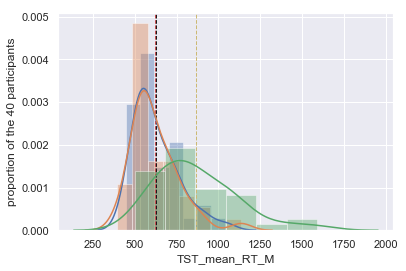

In [546]:
plt.axvline(mean_A, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean_W, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_M, color='y', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(switching["TST_mean_RT_A"])
sns.distplot(switching["TST_mean_RT_W"])
sns.distplot(switching["TST_mean_RT_M"])

Duidelijk dat de RT van de mixed blok veel meer gespreid en vertraagd zijn tegenover blok A en blok W (de non-switch blokken)

###### boxplot

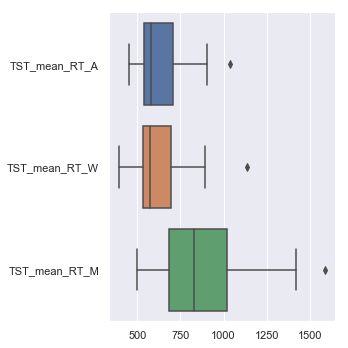

In [547]:
sns.catplot(data=switching, orient="h", kind="box")

Ziet er naaruit dat er een (significant) verschil is tussen de non-switch en de switch blok(ken).

###### ANOVA

long data nodig van de wide dataframe (switching).

In [549]:
switching = switching.reset_index()

In [552]:
switching_long = pd.melt(switching, id_vars=["index"], value_vars=["TST_mean_RT_A", "TST_mean_RT_W", "TST_mean_RT_M"], var_name="blok", value_name = "mean_RT")

In [554]:
switching_long = switching_long[["blok", "mean_RT"]] 

###### Point plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



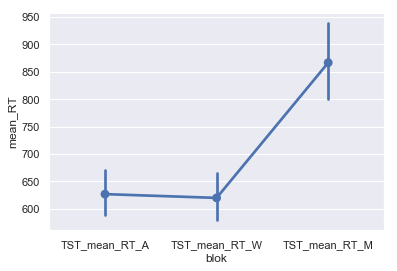

In [567]:
sns.pointplot(x = "blok", y="mean_RT", data=switching_long)

In [555]:
results = ols('mean_RT ~ C(blok)', data=switching_long).fit()

In [556]:
aov_table = anova_lm(results, typ=2)

In [557]:
print(aov_table)

                sum_sq     df          F        PR(>F)
C(blok)   1.580680e+06    2.0  24.893265  9.827790e-10
Residual  3.714651e+06  117.0        NaN           NaN


Significant hoofdeffect van blok: blok heeft dus weldegelijk een significante invloed op RT. 

In [558]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mean_RT   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     24.89
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           9.83e-10
Time:                        11:41:15   Log-Likelihood:                -790.69
No. Observations:                 120   AIC:                             1587.
Df Residuals:                     117   BIC:                             1596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  626.7833     28.173     22.248      0.000     570.988     682.579
C(blok)[T.TST_mean_RT_M]   239.9568     39.843      6.023      0.000     161.050     318.864
C(blok)[T.TST_mean_RT_W]    -6.8722     39.843     -0.172      0.863     -85.779      72.035
==============================================================================
Omnibus:                       31.211   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.443
Skew:                           1.158   Prob(JB):                     1.51e-12
Kurtosis:                       5.350   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

significant verschil van A tov M, maar niet van A tov W. 

###### joint plot & correlatie

In [ ]:
"TST_mean_RT_A", "TST_mean_RT_W", "TST_mean_RT_M"

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



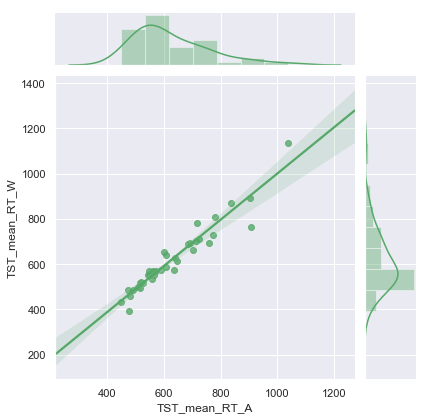

In [560]:
sns.jointplot(x=switching["TST_mean_RT_A"], y=switching["TST_mean_RT_W"], kind='reg', color='g')

In [563]:
linregress(switching["TST_mean_RT_A"], switching["TST_mean_RT_W"])

LinregressResult(slope=1.0191620852287864, intercept=-18.882637066209895, rvalue=0.9608446423340143, pvalue=8.812374031298013e-23, stderr=0.047677719932925196)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



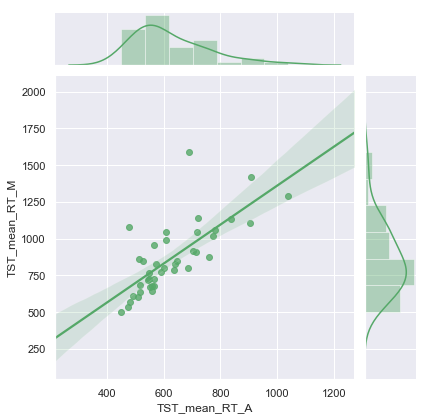

In [561]:
sns.jointplot(x=switching["TST_mean_RT_A"], y=switching["TST_mean_RT_M"], kind='reg', color='g')

In [565]:
linregress(switching["TST_mean_RT_A"], switching["TST_mean_RT_M"])

LinregressResult(slope=1.321233774148926, intercept=38.61283448395341, rvalue=0.7416661395629617, pvalue=4.3679149968298996e-08, stderr=0.19384407807369164)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



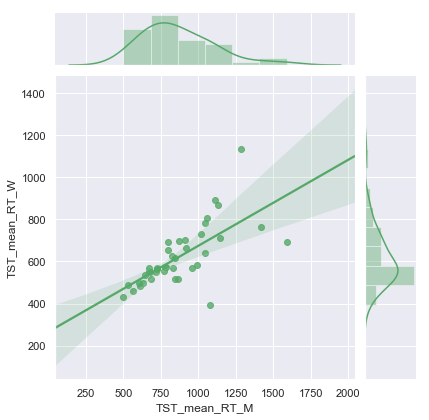

In [562]:
sns.jointplot(x=switching["TST_mean_RT_M"], y=switching["TST_mean_RT_W"], kind='reg', color='g')

In [566]:
linregress(switching["TST_mean_RT_M"], switching["TST_mean_RT_W"])

LinregressResult(slope=0.40898883350172344, intercept=265.424098664971, rvalue=0.6868985186937258, pvalue=9.853008552542614e-07, stderr=0.07019628235875852)

##### Vergelijking van TST_mean_RT_M en (TST_mean_RT_A+TST_mean_RT_W)/2

Het mixed wordt dus vergeleken met non-mixed (samengenomen).

###### TST_mean_RT_NM berekenen: (TST_mean_RT_A+TST_mean_RT_W)/2

In [570]:
switching["TST_mean_RT_NM"] = (switching["TST_mean_RT_A"]+switching["TST_mean_RT_W"])/2
switching.describe()

,level_0,index,TST_mean_RT_A,TST_mean_RT_W,TST_mean_RT_M,TST_mean_RT_NM
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,19.500000,19.500000,626.783264,619.911102,866.740053,623.347183
std,11.690452,11.690452,134.074481,142.211989,238.845653,136.785474
min,0.000000,0.000000,449.588587,392.971500,499.812137,434.693917
25%,9.750000,9.750000,540.083903,529.958104,682.638254,540.211938
50%,19.500000,19.500000,579.964309,570.911021,828.278077,575.278059
75%,29.250000,29.250000,705.141219,694.612010,1022.618778,696.178989
max,39.000000,39.000000,1039.408946,1135.574094,1589.015714,1087.491520


###### describe: mean?

In [572]:
mean_M = 866.740053
mean_NM = 623.347183

###### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



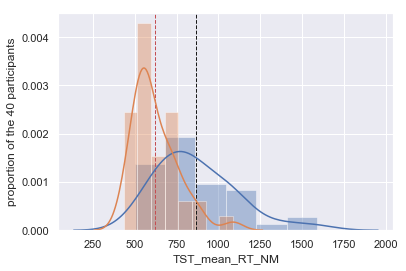

In [573]:
plt.axvline(mean_M, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean_NM, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(switching["TST_mean_RT_M"])
sns.distplot(switching["TST_mean_RT_NM"])

In [ ]:
blauw = mixed blok, oranje = non-mixed blokken

###### boxplot & t-test

In [574]:
compar = switching[["TST_mean_RT_M", "TST_mean_RT_NM"]]

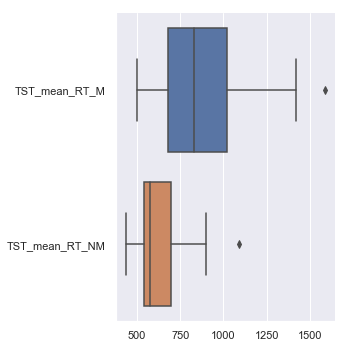

In [575]:
sns.catplot(data=compar, orient="h", kind="box")

In [577]:
ttest_ind(switching["TST_mean_RT_M"], switching["TST_mean_RT_NM"])

Ttest_indResult(statistic=5.5927447108843324, pvalue=3.17903655524869e-07)

In [579]:
diff_mean = mean_M -  mean_NM
diff_mean

243.39287000000002

###### joint plot & correlatie

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



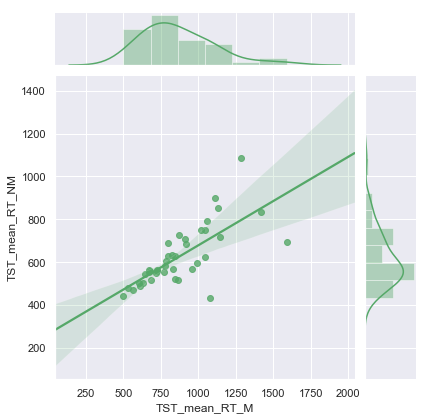

In [580]:
sns.jointplot(x=switching["TST_mean_RT_M"], y=switching["TST_mean_RT_NM"], kind='reg', color='g')

In [581]:
linregress(switching["TST_mean_RT_M"], switching["TST_mean_RT_NM"])

LinregressResult(slope=0.4126591917273998, intercept=265.67893355036387, rvalue=0.7205579001449376, pvalue=1.5820815987640935e-07, stderr=0.06441861820581989)

Een significante positieve correlatie: als iemand trager reageert op de mixed blokken, zal deze ook trager reageren op de non-mixed blokken (A en M).

##### Per participant de proportie van tijd berekenen dat ze meer nodig hebben om een mixed blok te vervullen tov een non-mixed blok: Prop_SC. 

In [583]:
switching["Prop_RT_SC"] = switching["TST_mean_RT_M"]/switching["TST_mean_RT_NM"]

In [584]:
switching["Prop_RT_SC"]

0     1.330550
1     1.176528
2     1.204121
3     1.158447
4     1.305790
5     1.251153
6     1.339522
7     1.272307
8     2.485503
9     1.233509
10    1.687589
11    1.394005
12    1.285136
13    1.321026
14    1.255094
15    1.293345
16    1.108297
17    1.390801
18    1.342483
19    1.216809
20    1.591484
21    1.299806
22    1.216885
23    1.183086
24    1.202717
25    1.456269
26    1.352190
27    1.336561
28    1.622777
29    1.330097
30    1.133965
31    2.295612
32    1.665666
33    1.194781
34    1.674306
35    1.205886
36    1.311218
37    1.284879
38    1.699273
39    1.676397
Name: Prop_RT_SC, dtype: float64

Proportie > 1: mixed blok leidt tot tragere reactie dan non-mixed blokken.<br>
Hoe groter de proportie, hoe slechter de participant kan omgaan met het feit dat er geswitcht worden in de mixed blok. <br>
Hoe dichter bij 1: hoe beter de participant kan omgaan met het feit dat er geswitcht wordt. 

In [585]:
switching["Prop_RT_SC"].describe()

count    40.000000
mean      1.394647
std       0.285539
min       1.108297
25%       1.216866
50%       1.308504
75%       1.409571
max       2.485503
Name: Prop_RT_SC, dtype: float64

###### histogram

In [586]:
mean_prop = 1.394647

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



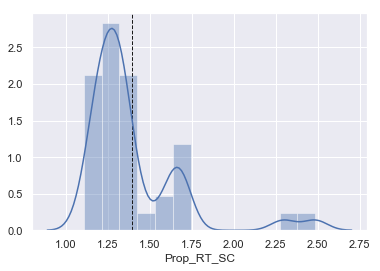

In [587]:
plt.axvline(mean_prop, color='k', linestyle='dashed', linewidth=1)
sns.distplot(switching["Prop_RT_SC"])

###### boxplot

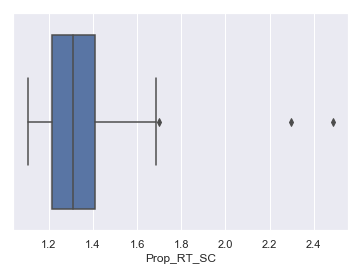

In [588]:
sns.boxplot(x=switching["Prop_RT_SC"])

2 outliers: heel slechte scoorders?

###### Aangemaakte kolommen opslaan in Excel. 

In [589]:
switching.to_excel("switching.xlsx")

## Accuraatheid

In [6]:
acc_TST = df_TST[[
 'TST_TOTACC_prop',
 'TST_TOT_ACC_prop_congr',
 'TST_TOT_ACC_prop_incongr',
 'TST_TOT_ACC_congrE',
 'TST_A_ACC_prop',
 'TST_A_ACC_prop_congr',
 'TST_A_ACC_prop_incongr',
 'TST_A_ACC_congrE',
 'TST_W_ACC_prop',
 'TST_W_ACC_prop_congr',
 'TST_W_ACC_prop_incongr',
 'TST_W_ACC_congrE',
 'TST_M_ACC_prop',
 'TST_M_ACC_prop_congr',
 'TST_M_ACC_prop_incongr',
 'TST_M_ACC_congrE',
 'TST_M_ACC_prop_AANTAL',
 'TST_M_ACC_prop_WAARDE',
 'TST_M_ACC_taakE',
 'TST_M_ACC_prop_S',
 'TST_M_ACC_prop_NS',
 'TST_M_ACC_switchE']]

### Totaal

In [10]:
acc_TOT = acc_TST[[ 'TST_TOTACC_prop',
 'TST_TOT_ACC_prop_congr',
 'TST_TOT_ACC_prop_incongr',
 'TST_TOT_ACC_congrE']]

In [11]:
acc_TOT.describe()

,TST_TOTACC_prop,TST_TOT_ACC_prop_congr,TST_TOT_ACC_prop_incongr,TST_TOT_ACC_congrE
count,40.000000,40.000000,40.000000,40.000000
mean,0.921384,0.946680,0.896088,0.050592
std,0.151174,0.151085,0.155797,0.052775
min,0.097656,0.070312,0.125000,-0.054688
25%,0.937500,0.968750,0.904297,0.023438
50%,0.957031,0.984375,0.937500,0.039062
75%,0.973633,0.992188,0.960938,0.062500
max,0.996094,1.000000,0.992188,0.304688


In [14]:
TOT_prop = 0.921384
TOT_prop_cong = 0.946680
TOT_prop_incong = 0.896088
TOT_prop_CE = 0.050592

#### Gemiddelde prop over blokken en congruentie heen: TOT_prop

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



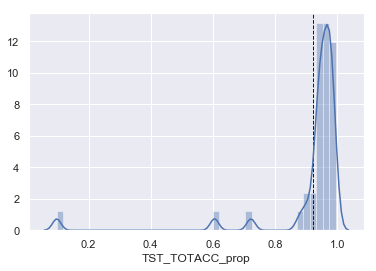

In [15]:
plt.axvline(TOT_prop, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_TOT["TST_TOTACC_prop"])

Heel erg scheefverdeeld & outliers?

##### boxplot

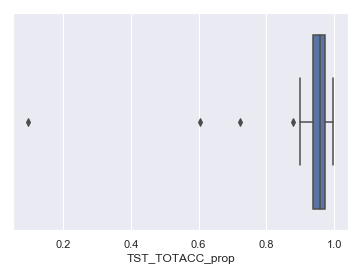

In [16]:
sns.boxplot(x=acc_TOT["TST_TOTACC_prop"])

vier outliers in proportie

#### Gemiddelde prop over de blokken heen: TST_TOT_ACC_prop_congr, TST_TOT_ACC_prop_incongr 

In [20]:
TOT_congr = acc_TOT[["TST_TOT_ACC_prop_congr","TST_TOT_ACC_prop_incongr"]]

##### Histogram

TOT_prop_cong 
TOT_prop_incong 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



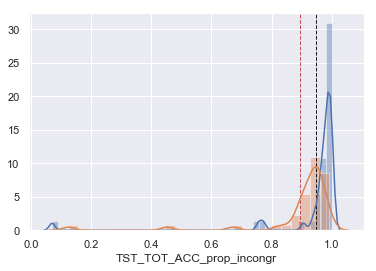

In [21]:
plt.axvline(TOT_prop_cong, color='k', linestyle='dashed', linewidth=1)
plt.axvline(TOT_prop_incong, color='r', linestyle='dashed', linewidth=1)
sns.distplot(TOT_congr["TST_TOT_ACC_prop_congr"])
sns.distplot(TOT_congr["TST_TOT_ACC_prop_incongr"])

##### boxplot

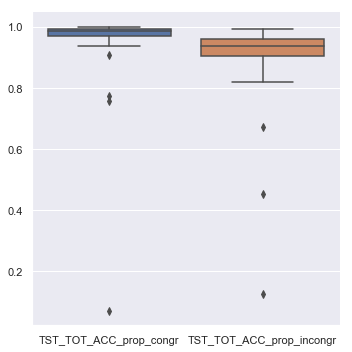

In [23]:
sns.catplot(data=TOT_congr, orient="v", kind="box")

##### diff_mean

In [25]:
TOT_prop_cong - TOT_prop_incong

0.05059199999999997

In [ ]:
5% meer fouten in de incongruente trials. 

##### t-test

In [26]:
ttest_ind(TOT_congr["TST_TOT_ACC_prop_congr"],TOT_congr["TST_TOT_ACC_prop_incongr"])

Ttest_indResult(statistic=1.4743643413683092, pvalue=0.1444083516373746)

In [ ]:
Geen significant verschil in fouten tussen congruent en incongruente trials. 

##### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



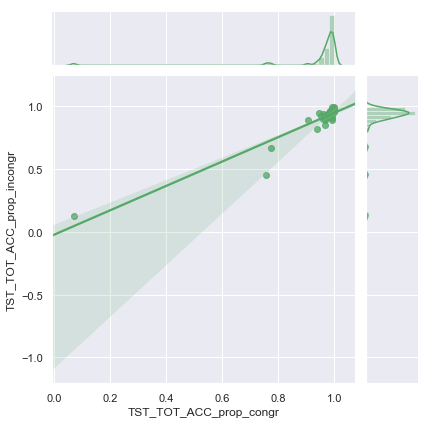

In [28]:
sns.jointplot(x=TOT_congr["TST_TOT_ACC_prop_congr"], y=TOT_congr["TST_TOT_ACC_prop_incongr"], kind='reg', color='g')

##### correlatietest

In [29]:
linregress(TOT_congr["TST_TOT_ACC_prop_congr"],TOT_congr["TST_TOT_ACC_prop_incongr"])

LinregressResult(slope=0.9706637688661265, intercept=-0.02282012377458209, rvalue=0.9413087729111305, pvalue=1.6246578357672658e-19, stderr=0.056464933134014676)

#### Gemiddelde verschil in proportie over de blokken heen: TST_TOT_ACC_congrE

via acc_TOT

In [ ]:
TOT_prop_CE

##### Histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



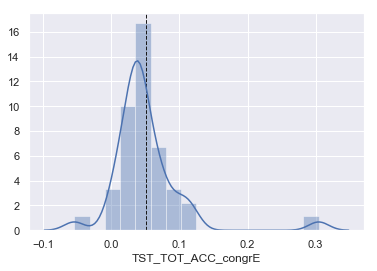

In [30]:
plt.axvline(TOT_prop_CE, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_TOT["TST_TOT_ACC_congrE"])

Positieve waarden tonen aan dat de accuraatheid van de congruente trials in het algemeen hoger licht dan de accuraatheid van de incongruente trials. 

##### Boxplot

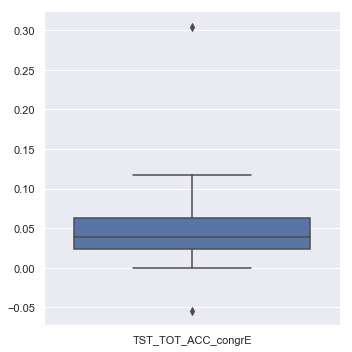

In [35]:
sns.catplot(data=acc_TOT[["TST_TOT_ACC_congrE"]], orient="v", kind="box")

### non-switch blokken (A & W)

In [36]:
acc_AW = acc_TST[['TST_A_ACC_prop',
 'TST_A_ACC_prop_congr',
 'TST_A_ACC_prop_incongr',
 'TST_A_ACC_congrE',
 'TST_W_ACC_prop',
 'TST_W_ACC_prop_congr',
 'TST_W_ACC_prop_incongr',
 'TST_W_ACC_congrE']]

In [12]:
acc_AW.describe()

,TST_A_ACC_prop,TST_A_ACC_prop_congr,TST_A_ACC_prop_incongr,TST_A_ACC_congrE,TST_W_ACC_prop,TST_W_ACC_prop_congr,TST_W_ACC_prop_incongr,TST_W_ACC_congrE
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.934115,0.942578,0.917188,0.025391,0.933846,0.942578,0.916354,0.026224
std,0.156852,0.152741,0.185830,0.105244,0.154331,0.152741,0.168848,0.074679
min,0.093750,0.062500,0.125000,-0.109375,0.083333,0.062500,0.125000,-0.078125
25%,0.947917,0.953125,0.937500,-0.015625,0.955729,0.953125,0.937500,-0.015625
50%,0.973958,0.984375,0.968750,0.015625,0.973958,0.984375,0.968750,0.000000
75%,0.989583,1.000000,1.000000,0.035156,0.989583,1.000000,1.000000,0.036719
max,1.000000,1.000000,1.000000,0.593750,1.000000,1.000000,1.000000,0.328125


In [37]:
A_TOT = 0.934115
A_con = 0.942578
A_incon = 0.917188
A_CE = 0.025391

In [38]:
W_TOT = 0.933846
W_con = 0.942578
W_incon = 0.916354
W_CE = 0.026224

#### Gemiddelde prop van de NS blokken over de congruentie heen: TST_A_ACC_prop, TST_W_ACC_prop

##### Histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



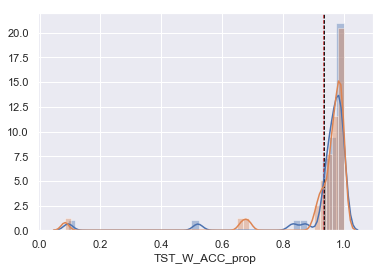

In [40]:
plt.axvline(A_TOT, color='k', linestyle='dashed', linewidth=1)
plt.axvline(W_TOT, color='r', linestyle='dashed', linewidth=1)
sns.distplot(acc_AW["TST_A_ACC_prop"])
sns.distplot(acc_AW["TST_W_ACC_prop"])


In [41]:
AW = acc_AW[["TST_A_ACC_prop","TST_W_ACC_prop"]]

##### Boxplot

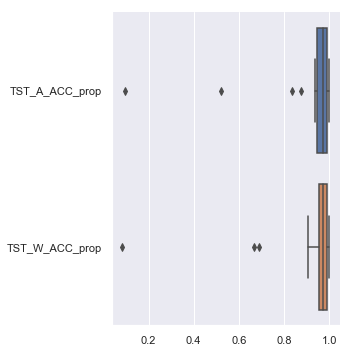

In [43]:
sns.catplot(data=AW, orient="h", kind="box")

##### Diff_mean

In [44]:
A_TOT - W_TOT

0.00026900000000007473

minimaal verschil in proportie.

##### T-test

In [46]:
ttest_ind(acc_AW["TST_A_ACC_prop"], acc_AW["TST_W_ACC_prop"])

Ttest_indResult(statistic=0.007726306075037076, pvalue=0.9938550880768895)

##### Joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



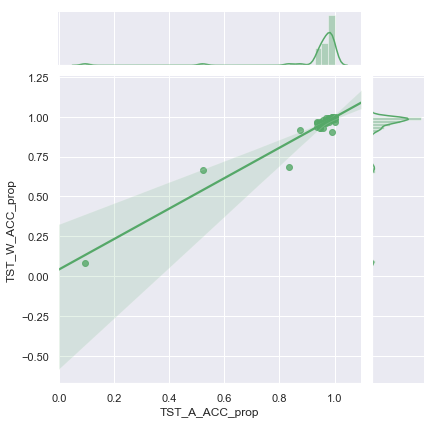

In [47]:
sns.jointplot(x=acc_AW["TST_A_ACC_prop"], y=acc_AW["TST_W_ACC_prop"], kind='reg', color='g')

##### Correlatietest

In [48]:
linregress(acc_AW["TST_A_ACC_prop"],acc_AW["TST_W_ACC_prop"])

LinregressResult(slope=0.9538008111415174, intercept=0.04288651884657846, rvalue=0.9693841602846001, pvalue=8.856398579444696e-25, stderr=0.039192979297102484)

#### Gemiddelde prop van de NS blokken: con <=> incon: TST_A_ACC_prop_congr,TST_A_ACC_prop_incongr,TST_W_ACC_prop_congr,TST_W_ACC_prop_incongr

In [ ]:
A_con
A_incon
W_con
W_incon
TST_W_ACC_prop_congr	TST_W_ACC_prop_incongr

##### Histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



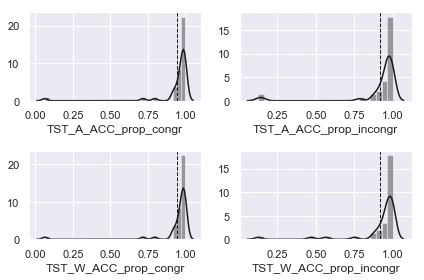

In [50]:
plt.subplot(2, 2, 1)
plt.axvline(A_con, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_AW["TST_A_ACC_prop_congr"], color='k')

plt.subplot(2, 2, 2)
plt.axvline(A_incon, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_AW["TST_A_ACC_prop_incongr"], color='k')

plt.subplot(2, 2, 3)
plt.axvline(W_con, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_AW["TST_W_ACC_prop_congr"], color='k')

plt.subplot(2, 2, 4)
plt.axvline(W_incon, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_AW["TST_W_ACC_prop_incongr"], color='k')

plt.tight_layout()

##### Boxplot

In [52]:
con = acc_AW[["TST_A_ACC_prop_congr","TST_A_ACC_prop_incongr","TST_W_ACC_prop_congr","TST_W_ACC_prop_incongr"]]

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

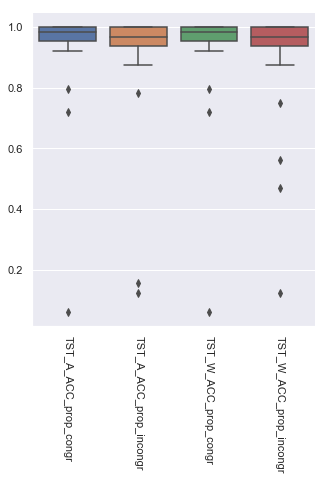

In [55]:
sns.catplot(data=con, orient="v", kind="box")
plt.xticks(rotation=-90)

In [ ]:
Er zijn outliers die heel erg laag scoren. 

##### ANOVA

###### long

In [57]:
con = con.reset_index()
con

,level_0,index,TST_A_ACC_prop_congr,TST_A_ACC_prop_incongr,TST_W_ACC_prop_congr,TST_W_ACC_prop_incongr
0,0,0,0.968750,0.96875,0.968750,0.968750
1,1,1,0.796875,0.90625,0.796875,0.468750
2,2,2,0.984375,1.00000,0.984375,1.000000
3,3,3,0.984375,0.96875,0.984375,1.000000
4,4,4,0.984375,0.96875,0.984375,0.968750
5,5,5,0.921875,0.78125,0.921875,0.906250
6,6,6,1.000000,0.96875,1.000000,0.937500
7,7,7,0.921875,0.96875,0.921875,0.968750
8,8,8,0.062500,0.15625,0.062500,0.125000
9,9,9,0.984375,0.96875,0.984375,1.000000


In [60]:
con_long = pd.melt(con, id_vars=["index"], value_vars = ["TST_A_ACC_prop_congr","TST_A_ACC_prop_incongr","TST_W_ACC_prop_congr","TST_W_ACC_prop_incongr"])
con_long.to_excel("conlong.xlsx")

In [62]:
con_long = pd.read_excel("C:/Users/beheerder/conlong.xlsx")
con_long

,index,variable,value,blok,congruency
0,0,TST_A_ACC_prop_congr,0.968750,A,congruent
1,1,TST_A_ACC_prop_congr,0.796875,A,congruent
2,2,TST_A_ACC_prop_congr,0.984375,A,congruent
3,3,TST_A_ACC_prop_congr,0.984375,A,congruent
4,4,TST_A_ACC_prop_congr,0.984375,A,congruent
5,5,TST_A_ACC_prop_congr,0.921875,A,congruent
6,6,TST_A_ACC_prop_congr,1.000000,A,congruent
7,7,TST_A_ACC_prop_congr,0.921875,A,congruent
8,8,TST_A_ACC_prop_congr,0.062500,A,congruent
9,9,TST_A_ACC_prop_congr,0.984375,A,congruent


point plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



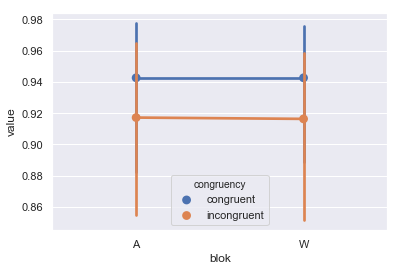

In [63]:
sns.pointplot(x="blok", y="value", hue="congruency", data=con_long)

In [64]:
results = ols('value ~ C(blok)+C(congruency)+C(blok):C(congruency)', data=con_long).fit()
aov_table = anova_lm(results, typ=2)
print(aov_table)

                         sum_sq     df         F    PR(>F)
C(blok)                0.000007    1.0  0.000253  0.987324
C(congruency)          0.026641    1.0  0.971386  0.325861
C(blok):C(congruency)  0.000007    1.0  0.000253  0.987324
Residual               4.278363  156.0       NaN       NaN


In [65]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3240
Date:                Tue, 18 Dec 2018   Prob (F-statistic):              0.808
Time:                        15:51:07   Log-Likelihood:                 62.698
No. Observations:                 160   AIC:                            -117.4
Df Residuals:                     156   BIC:                            -105.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.9426      0.026     35.997      0.000       0.891       0.994
C(blok)[T.W]                               2.327e-16      0.037   6.28e-15      1.000      -0.073       0.073
C(congruency)[T.incongruent]                 -0.0254      0.037     -0.686      0.494      -0.099       0.048
C(blok)[T.W]:C(congruency)[T.incongruent]    -0.0008      0.052     -0.016      0.987      -0.104       0.103
==============================================================================
Omnibus:                      168.687   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2596.646
Skew:                          -4.206   Prob(JB):                         0.00
Kurtosis:                      20.853   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Joint plot & correlaties

In [ ]:
acc_AW[["TST_A_ACC_prop_congr","TST_A_ACC_prop_incongr","TST_W_ACC_prop_congr","TST_W_ACC_prop_incongr"]]

###### A_con <=> A_incon

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



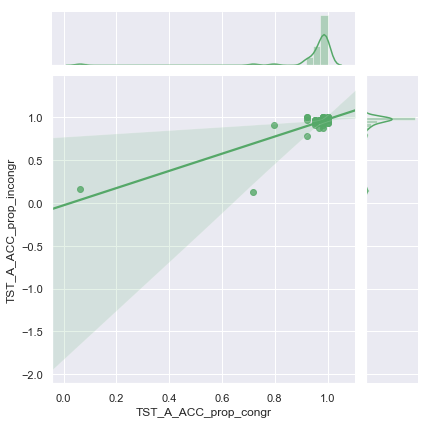

In [68]:
sns.jointplot(x=acc_AW["TST_A_ACC_prop_congr"], y=acc_AW["TST_A_ACC_prop_incongr"], kind='reg', color='g')

In [69]:
linregress(acc_AW["TST_A_ACC_prop_congr"], acc_AW["TST_A_ACC_prop_incongr"])

LinregressResult(slope=1.00271682621033, intercept=-0.02795144595528376, rvalue=0.8241704033273658, pvalue=6.385186117350507e-11, stderr=0.11177590178760997)

###### A_con <=> W_con

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



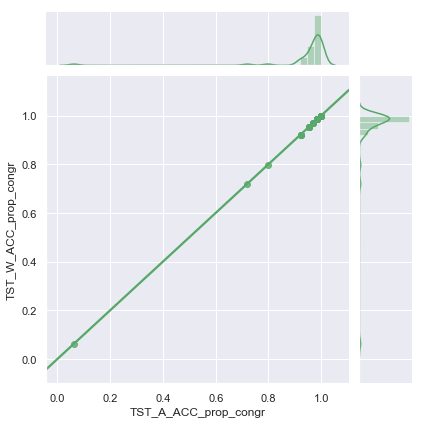

In [70]:
sns.jointplot(x=acc_AW["TST_A_ACC_prop_congr"], y=acc_AW["TST_W_ACC_prop_congr"], kind='reg', color='g')

In [71]:
linregress(acc_AW["TST_A_ACC_prop_congr"], acc_AW["TST_W_ACC_prop_congr"])

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)

###### A_con <=> W_incon

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



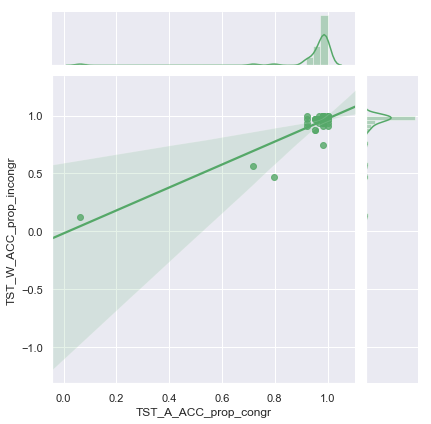

In [72]:
sns.jointplot(x=acc_AW["TST_A_ACC_prop_congr"], y=acc_AW["TST_W_ACC_prop_incongr"], kind='reg', color='g')

In [73]:
linregress(acc_AW["TST_A_ACC_prop_congr"], acc_AW["TST_W_ACC_prop_incongr"])

LinregressResult(slope=0.9914899611594487, intercept=-0.018202581879329327, rvalue=0.8969076210855254, pvalue=4.8755457653841375e-15, stderr=0.07930218985455227)

###### A_incon <=> W_con

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



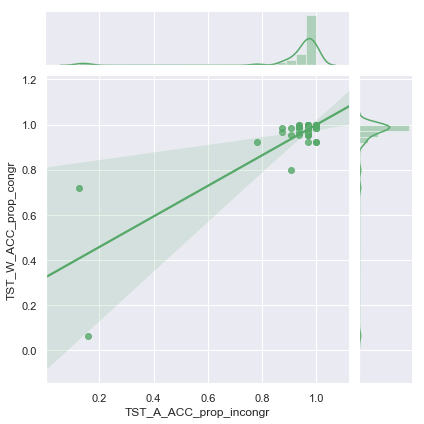

In [74]:
sns.jointplot(x=acc_AW["TST_A_ACC_prop_incongr"], y=acc_AW["TST_W_ACC_prop_congr"], kind='reg', color='g')

In [75]:
linregress(acc_AW["TST_A_ACC_prop_incongr"], acc_AW["TST_W_ACC_prop_congr"])

LinregressResult(slope=0.6774164310057282, intercept=0.3212602421869336, rvalue=0.8241704033273658, pvalue=6.385186117350507e-11, stderr=0.07551367493012104)

###### A_incon <=> W_incon

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



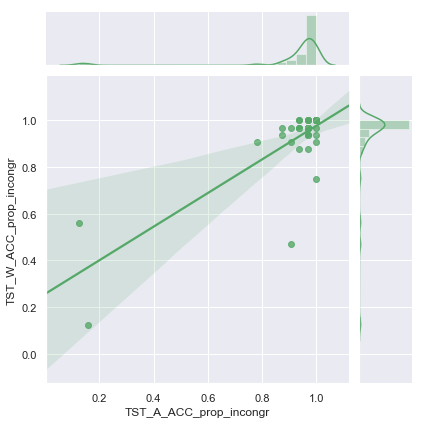

In [76]:
sns.jointplot(x=acc_AW["TST_A_ACC_prop_incongr"], y=acc_AW["TST_W_ACC_prop_incongr"], kind='reg', color='g')

In [77]:
linregress(acc_AW["TST_A_ACC_prop_incongr"], acc_AW["TST_W_ACC_prop_incongr"])

LinregressResult(slope=0.7187827810407751, intercept=0.2570955846808307, rvalue=0.79107624938123, pvalue=1.240599512779787e-09, stderr=0.09016509922255637)

###### W_con <=> W_incon

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



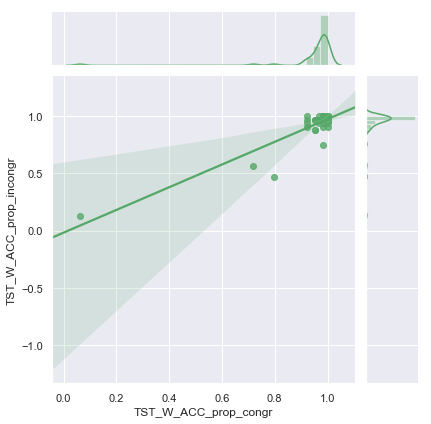

In [78]:
sns.jointplot(x=acc_AW["TST_W_ACC_prop_congr"], y=acc_AW["TST_W_ACC_prop_incongr"], kind='reg', color='g')

In [79]:
linregress(acc_AW["TST_W_ACC_prop_congr"], acc_AW["TST_W_ACC_prop_incongr"])

LinregressResult(slope=0.9914899611594487, intercept=-0.018202581879329327, rvalue=0.8969076210855254, pvalue=4.8755457653841375e-15, stderr=0.07930218985455227)

#### Gemiddelde verschil in prop: CE 

In [81]:
CE = acc_AW[["TST_A_ACC_congrE","TST_W_ACC_congrE"]]

In [82]:
CE.describe()

,TST_A_ACC_congrE,TST_W_ACC_congrE
count,40.000000,40.000000
mean,0.025391,0.026224
std,0.105244,0.074679
min,-0.109375,-0.078125
25%,-0.015625,-0.015625
50%,0.015625,0.000000
75%,0.035156,0.036719
max,0.593750,0.328125


In [84]:
A_CE = 0.025391
W_CE = 0.026224

##### Histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



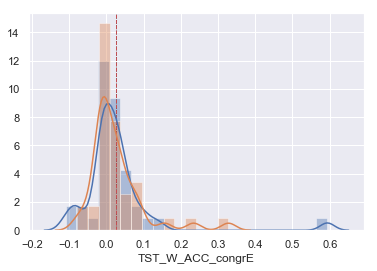

In [86]:
plt.axvline(A_CE, color='k', linestyle='dashed', linewidth=1)
plt.axvline(W_CE, color='r', linestyle='dashed', linewidth=1)
sns.distplot(CE["TST_A_ACC_congrE"])
sns.distplot(CE["TST_W_ACC_congrE"])


##### Boxplot

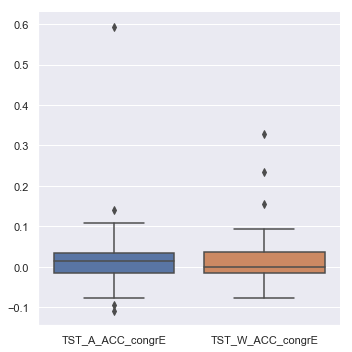

In [88]:
sns.catplot(data=CE, orient="v", kind="box")

##### t-test

In [89]:
ttest_ind(CE["TST_A_ACC_congrE"], CE["TST_W_ACC_congrE"])

Ttest_indResult(statistic=-0.04084129221526304, pvalue=0.9675267813468882)

In [ ]:
Geen significant verschil

##### joint plot 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



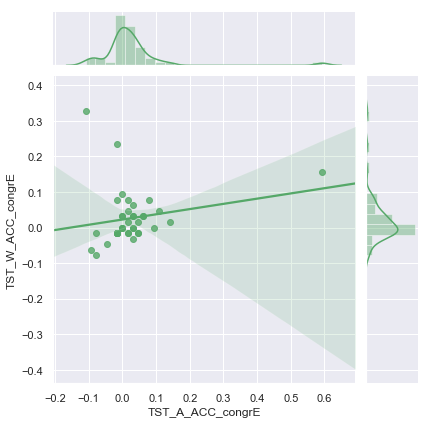

In [90]:
sns.jointplot(x=CE["TST_A_ACC_congrE"], y=CE["TST_W_ACC_congrE"], kind='reg', color='g')

##### correlatie

In [91]:
linregress(CE["TST_A_ACC_congrE"], CE["TST_W_ACC_congrE"])

LinregressResult(slope=0.14689273519368895, intercept=0.022494259978806073, rvalue=0.2070145639230987, pvalue=0.19994975102518145, stderr=0.11261506192614998)

### switch blok (M)

In [92]:
acc_M = acc_TST[[ 'TST_M_ACC_prop',
 'TST_M_ACC_prop_congr',
 'TST_M_ACC_prop_incongr',
 'TST_M_ACC_congrE',
 'TST_M_ACC_prop_AANTAL',
 'TST_M_ACC_prop_WAARDE',
 'TST_M_ACC_taakE',
 'TST_M_ACC_prop_S',
 'TST_M_ACC_prop_NS',
 'TST_M_ACC_switchE']]

In [93]:
acc_M.describe()

,TST_M_ACC_prop,TST_M_ACC_prop_congr,TST_M_ACC_prop_incongr,TST_M_ACC_congrE,TST_M_ACC_prop_AANTAL,TST_M_ACC_prop_WAARDE,TST_M_ACC_taakE,TST_M_ACC_prop_S,TST_M_ACC_prop_NS,TST_M_ACC_switchE
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.913086,0.950781,0.875391,0.075391,0.909766,0.916406,-0.006641,0.887121,0.922105,-0.034984
std,0.148265,0.150476,0.151096,0.054917,0.156869,0.157906,0.105612,0.150186,0.150020,0.052944
min,0.093750,0.078125,0.109375,-0.031250,0.093750,0.093750,-0.453125,0.121212,0.084211,-0.221691
25%,0.927734,0.968750,0.859375,0.042969,0.921875,0.917969,-0.031250,0.878788,0.936842,-0.068581
50%,0.949219,0.984375,0.906250,0.070312,0.937500,0.960938,-0.015625,0.939394,0.952632,-0.029027
75%,0.970703,1.000000,0.953125,0.097656,0.968750,0.984375,0.015625,0.969697,0.989474,-0.007974
max,0.992188,1.000000,0.984375,0.234375,0.984375,1.000000,0.406250,1.000000,1.000000,0.073365


#### Gemiddelde prop van Mixed over congruentie en switching heen: TST_M_ACC_prop

##### histogram

In [94]:
tot_M_prop = 0.913086

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



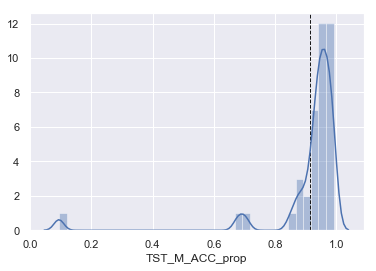

In [96]:
plt.axvline(tot_M_prop, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_M["TST_M_ACC_prop"])

##### boxplot

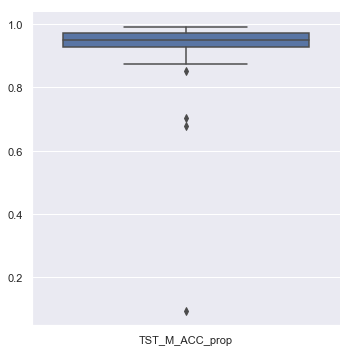

In [99]:
sns.catplot(data=acc_M[["TST_M_ACC_prop"]], orient="v", kind="box")

#### Gemiddelde prop van Mixed over switching heen: TST_M_ACC_prop_congr, TST_M_ACC_prop_incongr

In [100]:
con_M = 0.950781
incon_M = 0.875391

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



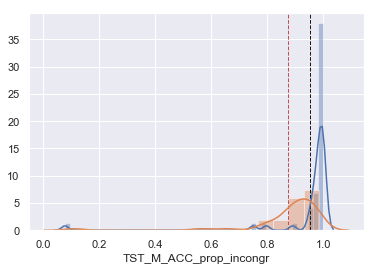

In [102]:
plt.axvline(con_M, color='k', linestyle='dashed', linewidth=1)
plt.axvline(incon_M, color='r', linestyle='dashed', linewidth=1)
sns.distplot(acc_M["TST_M_ACC_prop_congr"])
sns.distplot(acc_M["TST_M_ACC_prop_incongr"])


In [103]:
M_cgry = acc_M[["TST_M_ACC_prop_congr","TST_M_ACC_prop_incongr"]]

##### boxplot

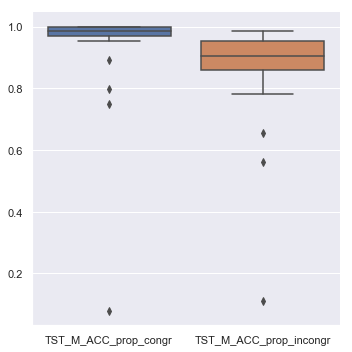

In [105]:
sns.catplot(data=M_cgry, orient="v", kind="box")

##### t-test

In [106]:
ttest_ind(acc_M["TST_M_ACC_prop_congr"],acc_M["TST_M_ACC_prop_incongr"])

Ttest_indResult(statistic=2.235987941421002, pvalue=0.028210782877171582)

Er is een significant verschil door de congruentie in de mixed blokken. 

##### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



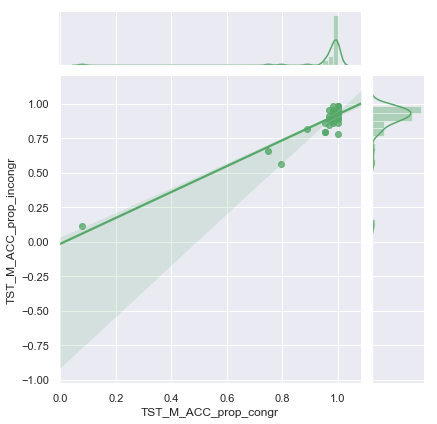

In [107]:
sns.jointplot(x=acc_M["TST_M_ACC_prop_congr"],y=acc_M["TST_M_ACC_prop_incongr"],kind='reg', color='g')

##### correlatietest

In [108]:
linregress(acc_M["TST_M_ACC_prop_congr"],acc_M["TST_M_ACC_prop_incongr"])

LinregressResult(slope=0.9375328301678133, intercept=-0.015998011182991267, rvalue=0.9336849302642467, pvalue=1.5465662453602518e-18, stderr=0.05833017893132683)

#### Gemiddelde verschil in prop van mixed over switching heen: TST_M_ACC_congrE

In [110]:
acc_M["TST_M_ACC_congrE"].describe()

count    40.000000
mean      0.075391
std       0.054917
min      -0.031250
25%       0.042969
50%       0.070312
75%       0.097656
max       0.234375
Name: TST_M_ACC_congrE, dtype: float64

In [111]:
CE_M = 0.075391

##### Histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



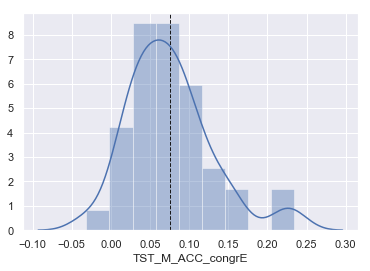

In [112]:
plt.axvline(CE_M, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_M["TST_M_ACC_congrE"])

In [ ]:
Vooral >0: dit betekent dat de meeste participanten het beter doen op congruente trials dan op incongruente. 

##### Boxplot

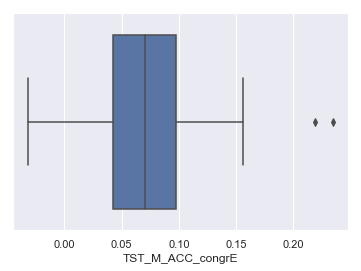

In [113]:
sns.boxplot(acc_M["TST_M_ACC_congrE"])

#### Gemiddelde prop van Mixed per taak: TST_M_ACC_prop_AANTAL, TST_M_ACC_prop_WAARDE

In [114]:
taak = acc_M[["TST_M_ACC_prop_AANTAL", "TST_M_ACC_prop_WAARDE"]]

In [115]:
taak.describe()

,TST_M_ACC_prop_AANTAL,TST_M_ACC_prop_WAARDE
count,40.000000,40.000000
mean,0.909766,0.916406
std,0.156869,0.157906
min,0.093750,0.093750
25%,0.921875,0.917969
50%,0.937500,0.960938
75%,0.968750,0.984375
max,0.984375,1.000000


In [116]:
M_A = 0.909766
M_W = 0.916406 

##### Histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



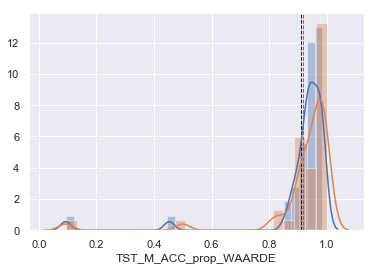

In [118]:
plt.axvline(M_A, color='k', linestyle='dashed', linewidth=1)
plt.axvline(M_W, color='r', linestyle='dashed', linewidth=1)
sns.distplot(taak["TST_M_ACC_prop_AANTAL"])
sns.distplot(taak["TST_M_ACC_prop_WAARDE"])


##### Boxplot

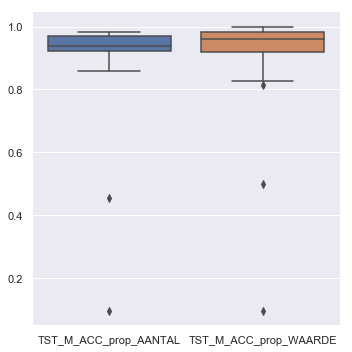

In [119]:
sns.catplot(data=taak, orient="v", kind="box")

##### t-test

In [120]:
ttest_ind(taak["TST_M_ACC_prop_AANTAL"],taak["TST_M_ACC_prop_WAARDE"])

Ttest_indResult(statistic=-0.18869098361676537, pvalue=0.8508251063550362)

In [ ]:
Geen significant verschil in accuraatheid op basis van de taak die ze moesten uitvoeren tijdens het mixed blok. 

##### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



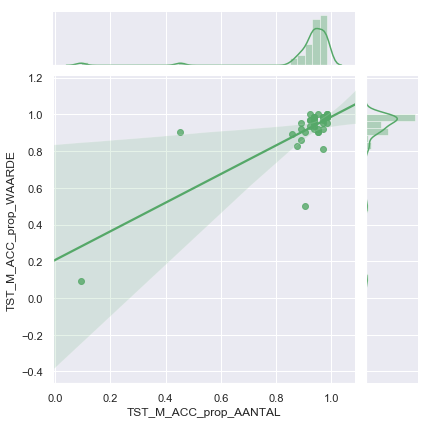

In [122]:
sns.jointplot(x=taak["TST_M_ACC_prop_AANTAL"],y=taak["TST_M_ACC_prop_WAARDE"],kind='reg', color='g')

##### correlatie

In [123]:
linregress(taak["TST_M_ACC_prop_AANTAL"],taak["TST_M_ACC_prop_WAARDE"])

LinregressResult(slope=0.7799973289069501, intercept=0.20679149256863794, rvalue=0.7748767878252789, pvalue=4.397229603399931e-09, stderr=0.10321977523263264)

#### Gemiddelde verschil in prop van mixed per taak: TST_M_ACC_taakE

##### Histogram

In [126]:
mean_taak = -0.006641

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



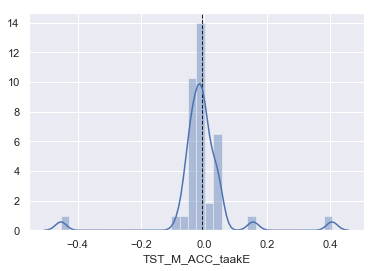

In [127]:
plt.axvline(mean_taak, color='k', linestyle='dashed', linewidth=1)
sns.distplot(acc_M["TST_M_ACC_taakE"])

##### boxplot

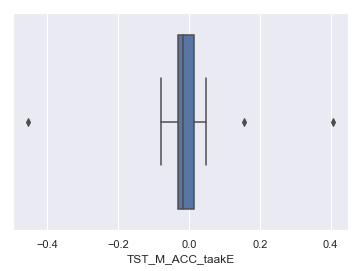

In [128]:
sns.boxplot(x=acc_M["TST_M_ACC_taakE"])

Geen belangrijk effect op de accuraatheid door de taak die ze moeten uitvoeren. m

#### Gemiddelde prop van mixed over congruentie heen: TST_M_ACC_prop_S,TST_M_ACC_prop_NS

Dit is de factor die de proportie accuraatheid het meest zou 'moeten' beïnvloeden. 

In [134]:
switch = acc_M[["TST_M_ACC_prop_S","TST_M_ACC_prop_NS"]]

In [ ]:
acc_M[["TST_M_ACC_switchE"]]

##### histogram

In [131]:
mean_S = 0.887121
mean_NS = 0.922105

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



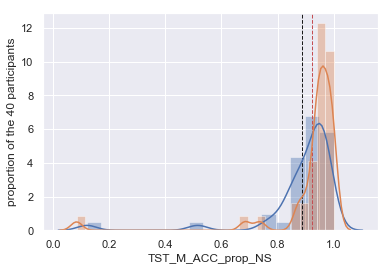

In [135]:
plt.axvline(mean_S, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean_NS, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('mean reaction time in ms')
sns.distplot(switch["TST_M_ACC_prop_S"])
sns.distplot(switch["TST_M_ACC_prop_NS"])


Accuraatheidsverdeling is lager voor de S trials dan voor de NS trials. 

##### boxplot

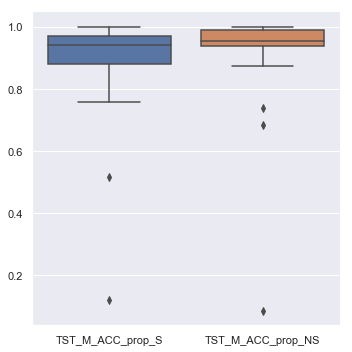

In [136]:
sns.catplot(data=switch, orient="v", kind="box")

Is er een significant verschil tussen deze twee gemiddelden?

##### t-test

In [137]:
ttest_ind(switch["TST_M_ACC_prop_S"],switch["TST_M_ACC_prop_NS"])

Ttest_indResult(statistic=-1.0423036723180275, pvalue=0.30049075697148575)

In [ ]:
Het verschil in proportie is niet significant. 

##### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



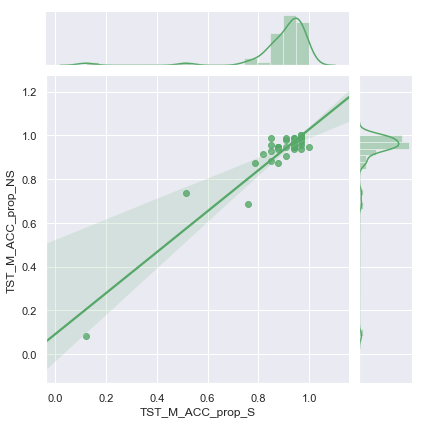

In [138]:
sns.jointplot(x=switch["TST_M_ACC_prop_S"],y=switch["TST_M_ACC_prop_NS"], kind='reg', color='g')

##### correlatie

In [139]:
linregress(switch["TST_M_ACC_prop_S"],switch["TST_M_ACC_prop_NS"])

LinregressResult(slope=0.9367588704792591, intercept=0.09108659851303669, rvalue=0.9377954320084365, pvalue=4.754237941352389e-19, stderr=0.056259129241454923)

#### Gemiddelde verschil in prop van mixed over congruentie heen: SC

In [140]:
SC_prop = acc_M[["TST_M_ACC_switchE"]]

In [141]:
SC_prop.describe()

,TST_M_ACC_switchE
count,40.000000
mean,-0.034984
std,0.052944
min,-0.221691
25%,-0.068581
50%,-0.029027
75%,-0.007974
max,0.073365


In [142]:
mean_SC = -0.034984

##### Histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



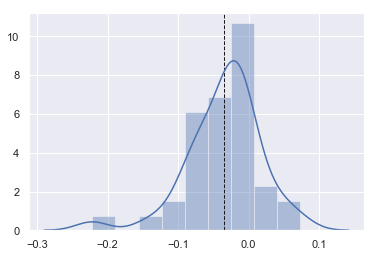

In [143]:
plt.axvline(mean_SC, color='k', linestyle='dashed', linewidth=1)
sns.distplot(SC_prop)

Zowel positieve als negatieve proportiesverschillen:  <br>
    <li> positief verschilscore = proportie juiste antwoorden is groter bij S trials dan bij NS trials. </li>
    <li> negatief verschilscore = proportie juiste antwoorden is groter bij NS trials dan bij S trials </li>

##### boxplot

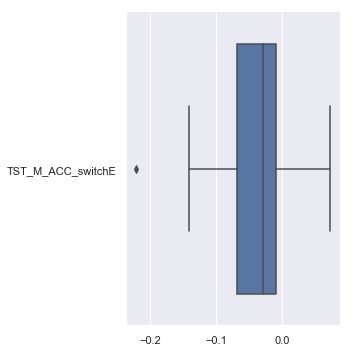

In [145]:
sns.catplot(data=SC_prop, orient="h", kind="box")

### switch <=> non-switch: multitasking 

In [180]:
multitasking = acc_TST[["TST_A_ACC_prop", "TST_W_ACC_prop", "TST_M_ACC_prop"]]

In [148]:
multitasking.describe()

,TST_A_ACC_prop,TST_W_ACC_prop,TST_M_ACC_prop
count,40.000000,40.000000,40.000000
mean,0.934115,0.933846,0.913086
std,0.156852,0.154331,0.148265
min,0.093750,0.083333,0.093750
25%,0.947917,0.955729,0.927734
50%,0.973958,0.973958,0.949219
75%,0.989583,0.989583,0.970703
max,1.000000,1.000000,0.992188


#### TST_prop_A, TST_prop_W en TST_prop_M: verschil in accuraatheid afhankelijk van de blokken?

In [149]:
A_mean = 0.934115
W_mean = 0.933846
M_mean = 0.913086

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



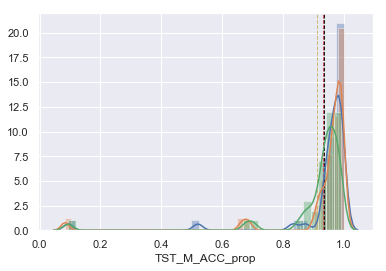

In [150]:
plt.axvline(A_mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(W_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(M_mean, color='y', linestyle='dashed', linewidth=1)
sns.distplot(multitasking["TST_A_ACC_prop"])
sns.distplot(multitasking["TST_W_ACC_prop"])
sns.distplot(multitasking["TST_M_ACC_prop"])

##### boxplot

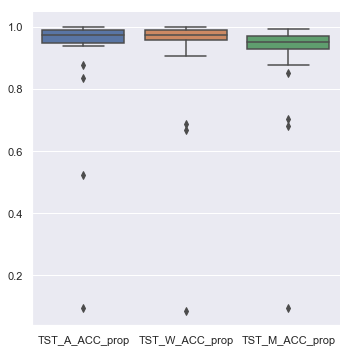

In [181]:
sns.catplot(data=multitasking, orient="v", kind="box")

##### point plot

In [160]:
multitasking = multitasking.reset_index()

In [161]:
multitasking_long = pd.melt(multitasking, id_vars=["index"], value_vars=["TST_A_ACC_prop", "TST_W_ACC_prop", "TST_M_ACC_prop"])

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



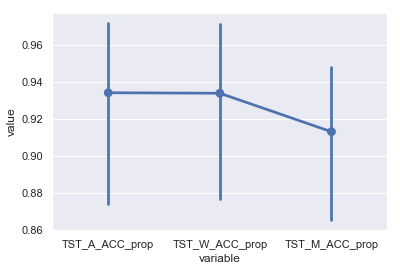

In [163]:
sns.pointplot(x="variable", y="value", data=multitasking_long)

##### ANOVA

In [164]:
results = ols('value ~ C(variable)', data=multitasking_long).fit()

In [165]:
aov_table = anova_lm(results, typ=2)
print(aov_table)

               sum_sq     df        F    PR(>F)
C(variable)  0.011643    2.0  0.24807  0.780715
Residual     2.745727  117.0      NaN       NaN


In [166]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2481
Date:                Wed, 19 Dec 2018   Prob (F-statistic):              0.781
Time:                        09:43:13   Log-Likelihood:                 56.374
No. Observations:                 120   AIC:                            -106.7
Df Residuals:                     117   BIC:                            -98.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.9341      0.024     38.565      0.000       0.886       0.982
C(variable)[T.TST_M_ACC_prop]    -0.0210      0.034     -0.614      0.540      -0.089       0.047
C(variable)[T.TST_W_ACC_prop]    -0.0003      0.034     -0.008      0.994      -0.068       0.068
==============================================================================
Omnibus:                      144.016   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2641.213
Skew:                          -4.513   Prob(JB):                         0.00
Kurtosis:                      24.137   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Geen significant effect van mixed op de accuraatheid. 

#### Mixed <=> Non Mixed: TST_prop_M <=> (TST_prop_A+TST_prop_W)/2

In [168]:
multitasking

,index,TST_A_ACC_prop,TST_W_ACC_prop,TST_M_ACC_prop
0,0,0.968750,0.968750,0.945312
1,1,0.833333,0.687500,0.703125
2,2,0.989583,0.989583,0.937500
3,3,0.979167,0.989583,0.960938
4,4,0.979167,0.979167,0.953125
5,5,0.875000,0.916667,0.875000
6,6,0.989583,0.979167,0.960938
7,7,0.937500,0.937500,0.851562
8,8,0.093750,0.083333,0.093750
9,9,0.979167,0.989583,0.960938


##### berekening

In [169]:
multitasking["NM"] = (multitasking["TST_A_ACC_prop"]+multitasking["TST_W_ACC_prop"])/2

##### describe

In [171]:
multitasking.describe()

,index,TST_A_ACC_prop,TST_W_ACC_prop,TST_M_ACC_prop,NM
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,19.500000,0.934115,0.933846,0.913086,0.933980
std,11.690452,0.156852,0.154331,0.148265,0.154396
min,0.000000,0.093750,0.083333,0.093750,0.088542
25%,9.750000,0.947917,0.955729,0.927734,0.947917
50%,19.500000,0.973958,0.973958,0.949219,0.973958
75%,29.250000,0.989583,0.989583,0.970703,0.989583
max,39.000000,1.000000,1.000000,0.992188,1.000000


In [172]:
M_mean = 0.913086
NM_mean = 0.933980

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



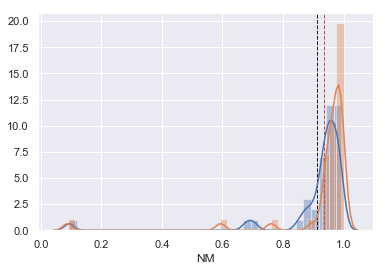

In [174]:
plt.axvline(M_mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(NM_mean, color='r', linestyle='dashed', linewidth=1)
sns.distplot(multitasking["TST_M_ACC_prop"])
sns.distplot(multitasking["NM"])


##### boxplot & t-test

In [175]:
multitasking = multitasking[["TST_M_ACC_prop", "NM"]]

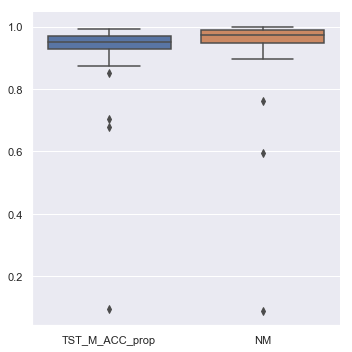

In [177]:
sns.catplot(data=multitasking, orient="v", kind="box")

In [178]:
ttest_ind(multitasking["TST_M_ACC_prop"], multitasking["NM"])

Ttest_indResult(statistic=-0.6173411555958273, pvalue=0.5388077943020066)

In [ ]:
Geen significant verschil tussen de proportie accuraatheid tussen de non-mixed en mixed blokken. 

#### Prop_SC_prop: M/NM

##### berekening

In [182]:
multitasking = acc_TST[["TST_A_ACC_prop", "TST_W_ACC_prop", "TST_M_ACC_prop"]]

In [183]:
multitasking["NM_ACC_prop"] = (multitasking["TST_A_ACC_prop"]+multitasking["TST_W_ACC_prop"])/2

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [184]:
multitasking["prop_SC_prop"] = multitasking["TST_M_ACC_prop"]/multitasking["NM_ACC_prop"]

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



interpretatie: 
<li> Indien de proportie accuraatheid van mixed blokken > proportie accuraatheid van non-mixed: > 1. </li>
<li> Indien de proportie accuraatheid van mixed blokken < proportie accuraatheid van non-mixed: < 1. </li>

##### describe

In [187]:
multitasking["prop_SC_prop"].describe()

count    40.000000
mean      0.980826
std       0.041272
min       0.900000
25%       0.972816
50%       0.979515
75%       0.992094
max       1.144737
Name: prop_SC_prop, dtype: float64

Het gemiddelde heeft aan dat de participanten gemiddeld een lagere accuraatheid hebben voor mixed blokken dan voor non-mixed blokken. 

In [188]:
Mul_mean = 0.980826

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



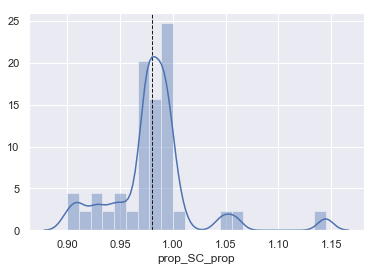

In [189]:
plt.axvline(Mul_mean, color='k', linestyle='dashed', linewidth=1)
sns.distplot(multitasking["prop_SC_prop"])

##### boxplot

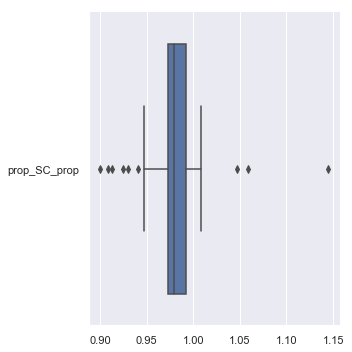

In [192]:
sns.catplot(data=multitasking[["prop_SC_prop"]], orient="h", kind="box")

##### opslaan

In [193]:
multitasking.to_excel("multitasking.xlsx")

## Link tussen proportie reactietijden & proportie accuraatheden 

Kan teruggevonden worden in de universiteit dataset onder het deel omtrent TST. <br> 
Deze dataset dus inlezen. 

In [195]:
link = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/universiteit.xlsx")

In [198]:
link=link[["Prop_RT_SC", "prop_SC_prop"]]

In [200]:
link.describe()

,Prop_RT_SC,prop_SC_prop
count,40.000000,40.000000
mean,1.394647,0.980826
std,0.285539,0.041272
min,1.108297,0.900000
25%,1.216866,0.972816
50%,1.308504,0.979515
75%,1.409571,0.992094
max,2.485503,1.144737


<b>interpretatie prop_RT:</b>
<li>prop > 1: RT van de mixed blok > RT van de non-mixed blokken</li>
    => gemiddelde suggereert dit. <br>
<li>prop < 1: RT van de mixed blok < RT van de non-mixed blokken</li><br>
<b>interpretatie prop_prop:</b><br>
<li>prop > 1: prop ACC van de mixed blok > prop ACC van de non-mixed blokken</li>
<li>prop < 1: prop ACC van de mixed blok < prop ACC van de non-mixed blokken</li>
    => gemiddelde suggereert dit.<br>

Hoe zijn die proporties met elkaar gecorreleerd? 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



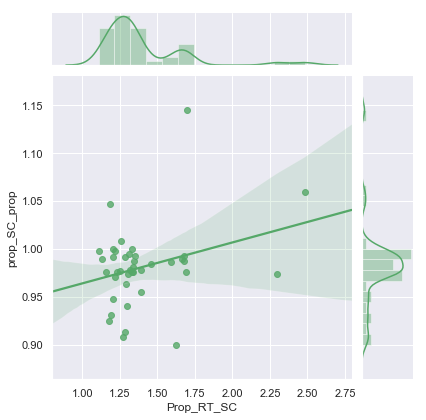

In [201]:
sns.jointplot(x=link["Prop_RT_SC"],y=link["prop_SC_prop"], kind='reg', color='g')

In [202]:
linregress(link["Prop_RT_SC"],link["prop_SC_prop"])

LinregressResult(slope=0.04274147512434705, intercept=0.9212167916975245, rvalue=0.2957054401250927, pvalue=0.06394354279946798, stderr=0.022399003731420477)

Geen significante correlatie tussen de prop_RT en prop_prop. 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



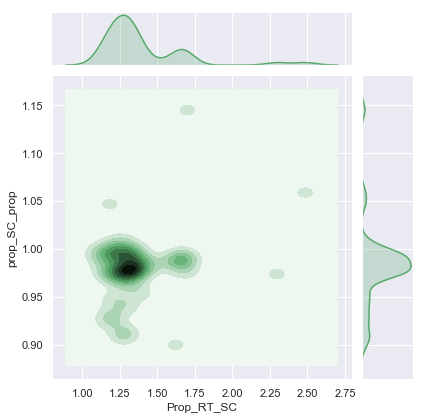

In [203]:
sns.jointplot(x=link["Prop_RT_SC"],y=link["prop_SC_prop"], kind='kde', color='g')

<b>Zwaartepunt van de scores:</b> positieve proportie RT (trials van de mixed blok trager) en lichtjes negatieve proportie ACC (trials van de mixed blok minder accuraat)

# Stroop taak 

Wat hield deze taak in? 
<ul>
    <li> <b>congruente trials:</b> zelfde kleur als kleurwoord. </li>
    <li> <b>incongruente trials:</b> ander kleur dan kleurwoord. </li>
    <li> <b>Stroop effect:</b> verschil in RT/accuraatheid tussen incongruente en congruente trials </li>  
</ul>

In [6]:
df_STR = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/ppndata/CLEAN STROOP/STR_original.xlsx')

In [7]:
df_STR["STR_mean_RT_TOT", "STR_mean_RT_congruent", "STR_mean_RT_incongruent"]

,ppn,Geslacht,leeftijd,IQ,outliersSTR,restingdpSTR,STR_mean_RT_TOT,STR_mean_RT_congruent,STR_mean_RT_incongruent,STR_CE_RT,STR_TOTcorrect,STR_TOTfout,STR_TOTACC_prop,STR_correct_congr,STR_fout_congr,STR_ACC_prop_congr,STR_correct_incongr,STR_fout_incongr,STR_ACC_prop_incongr,STR_ACC_congrE
0,1,V,18,22.0,19,39,813.600821,784.183826,855.887750,71.703924,58,0,1.000000,27,0,1.000000,31,0,1.000000,0.000000
1,2,M,21,21.0,5,92,948.697435,862.904520,1050.831857,187.927337,97,3,0.970000,50,0,1.000000,47,3,0.940000,0.060000
2,3,M,23,22.0,1,95,848.683305,730.923878,974.122696,243.198818,96,4,0.960000,50,2,0.961538,46,2,0.958333,0.003205
3,4,M,19,29.0,5,87,670.873586,673.166898,667.916421,-5.250477,92,8,0.920000,51,1,0.980769,41,7,0.854167,0.126603
4,5,M,18,27.0,1,95,831.058168,778.408863,892.083500,113.674637,96,4,0.960000,51,0,1.000000,45,4,0.918367,0.081633
5,6,V,19,27.0,5,86,635.458512,607.050511,669.693795,62.643284,91,9,0.910000,50,1,0.980392,41,8,0.836735,0.143657
6,8,V,18,28.0,3,96,811.131073,700.455617,917.289163,216.833546,99,1,0.990000,48,0,1.000000,51,1,0.980769,0.019231
7,9,V,18,27.0,5,86,635.729256,589.284350,676.116130,86.831780,91,9,0.910000,41,7,0.854167,50,2,0.961538,-0.107372
8,10,M,18,21.0,3,90,1308.075467,1110.237784,1566.786282,456.548498,93,7,0.930000,51,1,0.980769,42,6,0.875000,0.105769
9,11,V,18,26.0,2,97,967.835402,873.969540,1067.692702,193.723162,99,1,0.990000,51,0,1.000000,48,1,0.979592,0.020408


inspectie van de dataset:<br>
<ul>
<li> Wat is véél outliers? Ppn 25 (20), ppn 21 (44), ppn 1 (19)</li>
</ul>

## Reactietijden

### Wat zijn de kenmerken van de vier kolommen: (1) algemeen, (2) congruent, (3) incongruent?
    

In [61]:
df_STR[["STR_mean_RT_TOT", "STR_mean_RT_congruent", "STR_mean_RT_incongruent", "STR_CE_RT"]].describe()

,STR_mean_RT_TOT,STR_mean_RT_congruent,STR_mean_RT_incongruent,STR_CE_RT
count,40.000000,40.000000,40.000000,40.000000
mean,831.980719,764.519773,907.574210,143.054437
std,211.845414,188.903094,250.238479,99.632766
min,510.483742,482.108851,539.475478,-5.250477
25%,677.978980,641.245440,732.132314,81.290476
50%,794.020174,706.762166,876.639182,130.600371
75%,908.331445,823.482118,1005.887529,187.719322
max,1547.052220,1352.218957,1796.005833,456.548498


Kijken of van elke kolom de min en max waarde binnen [mean-+2*SD]

In [62]:
TOT_mean = 831.981
TOT_sd = 211.845
con_mean = 764.519
con_sd = 188.903
incon_mean = 907.574
incon_sd = 250.238
CE_mean = 143.0544
CE_sd = 99.633

In [63]:
CE_min = CE_mean - 2*CE_sd
CE_min

-56.211600000000004

In [ ]:
Oké, de eigenlijke minimale waarde ligt boven die berekende minimale waarde. 

In [65]:
CE_max = CE_mean + 2*CE_sd
CE_max

342.32039999999995

In [64]:
CE_max = CE_mean + 2*CE_sd
CE_max

342.32039999999995

In [ ]:
Het eigenlijke maximum ligt wél hoger dan het berekende mogelijke maximum. 

In [14]:
TOT_min = TOT_mean - 2* TOT_sd
TOT_min

408.291

OK. 

In [17]:
TOT_max = TOT_mean + 2* TOT_sd
TOT_max

1255.671

De maximale totale reactietijd is groter dan de berekende maximale waarde.

In [18]:
con_min = con_mean - 2* con_sd
con_min

386.713

OK

In [19]:
con_max = con_mean + 2* con_sd
con_max

1142.325

De maximale totale reactietijd is groter dan de berekende maximale waarde.

In [20]:
incon_min = incon_mean - 2* incon_sd
incon_min

407.09799999999996

OK.

In [21]:
incon_max = incon_mean + 2* incon_sd
incon_max

1408.05

De maximale totale reactietijd is groter dan de berekende maximale waarde.

#### De verdelingen van de drie kolommen visualiseren

##### TOT_RT via histogram

In [75]:
x=df_STR[["STR_mean_RT_TOT"]]
y=df_STR[["STR_mean_RT_congruent"]]
z=df_STR[["STR_mean_RT_incongruent"]]
a=df_STR[["STR_CE_RT"]]

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


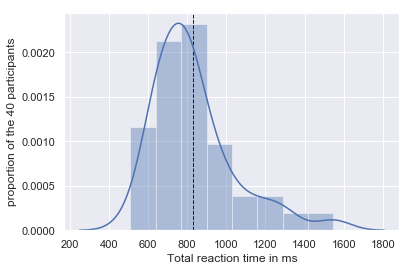

In [39]:
plt.axvline(TOT_mean, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(con_mean, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(incon_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('Total reaction time in ms')
sns.distplot(x)
#sns.distplot(y)
#sns.distplot(z)

##### Tot_RT boxplot 

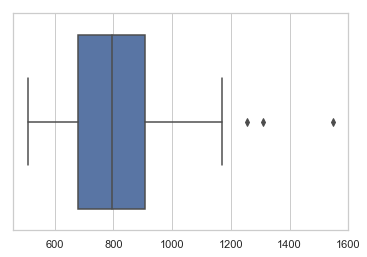

In [68]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=x)

Drie outliers: wat mee doen? 

##### con_RT histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


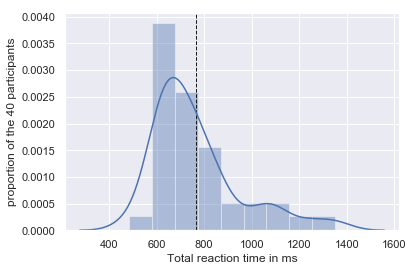

In [40]:
plt.axvline(con_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('Total reaction time in ms')
sns.distplot(y)

##### con_RT boxplot

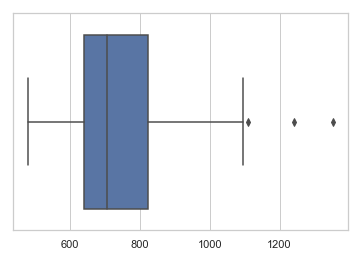

In [69]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=y)

Drie outliers: wat mee doen? 

##### incon_RT histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


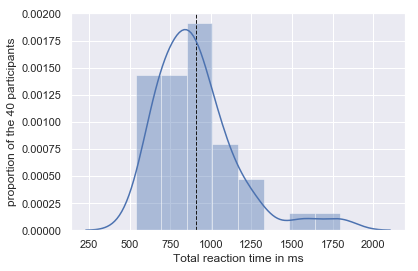

In [41]:
plt.axvline(incon_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('Total reaction time in ms')
sns.distplot(z)

##### incon_RT boxplot

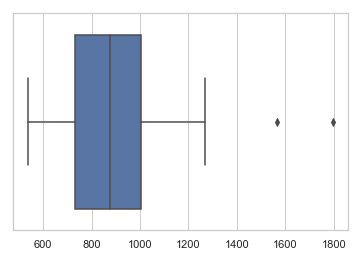

In [70]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=z)

Twee outliers: wat mee doen? 

##### con_RT en incon_RT gevisualiseerd op zelfde histogram 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


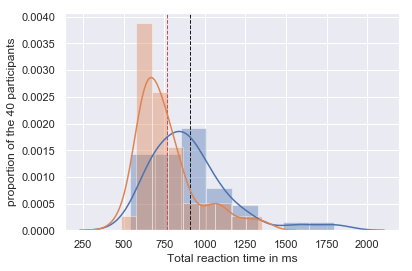

In [44]:
plt.axvline(incon_mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(con_mean, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('Total reaction time in ms')
sns.distplot(z)
sns.distplot(y)

De piek van de congruente trials is lager in gemiddelde RT en is ook veel specifieker (spitsere top); 
terwijl de piek van de incongruente trials hoger is in gemiddelde RT en ook veel minder specifiek (bredere top). 

##### con_RT en incon_RT gevisualiseerd via joint plot 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


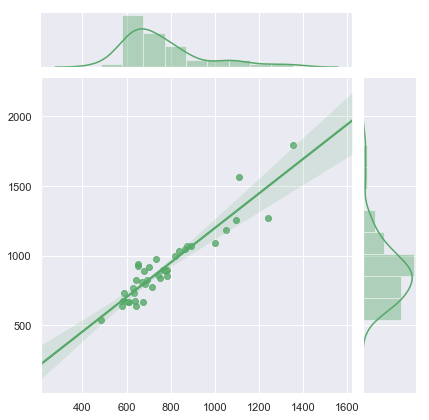

In [42]:
sns.jointplot(x=y, y=z, kind='reg', color='g')

correlatie-test

In [56]:
#y = np.asarray(y)
#z = np.asarray(z)

In [86]:
linregress(df_STR["STR_mean_RT_congruent"], df_STR["STR_mean_RT_incongruent"])

LinregressResult(slope=1.2383147717549021, intercept=-39.14191834549922, rvalue=0.9347942538518539, pvalue=1.1334789625057778e-18, stderr=0.07632794151620774)

Significant positief verband waarbij de r waarde erg dicht is bij 1. Betekenis dus: als je dus trager scoort op in RT op congruente trials, zal je ook trager scoren op incongruente trials. <br>
Wie dus traag is op de ene conditie, zal dat ook zijn op de andere conditie, maar de incongruente trials zijn in het algemeen ook al trager dan de congruente trials; onafhankelijk van de participant. 

#### Boxplot vergelijking incongruent & congruent 

In [ ]:
Maak een verticale boxplot die gegroepeerd is door een categorische variabele. X = type trials, Y = RT. <br>
Moet dus geherstructureerd worden. 

In [106]:
congr_df = df_STR[["ppn", "STR_mean_RT_congruent", "STR_mean_RT_incongruent"]]
congr_df

,ppn,STR_mean_RT_congruent,STR_mean_RT_incongruent
0,1,784.183826,855.887750
1,2,862.904520,1050.831857
2,3,730.923878,974.122696
3,4,673.166898,667.916421
4,5,778.408863,892.083500
5,6,607.050511,669.693795
6,8,700.455617,917.289163
7,9,589.284350,676.116130
8,10,1110.237784,1566.786282
9,11,873.969540,1067.692702


In [129]:
congr_df.describe()

,ppn,STR_mean_RT_congruent,STR_mean_RT_incongruent
count,40.000000,40.000000,40.000000
mean,21.800000,764.519773,907.574210
std,12.512968,188.903094,250.238479
min,1.000000,482.108851,539.475478
25%,11.750000,641.245440,732.132314
50%,21.500000,706.762166,876.639182
75%,32.250000,823.482118,1005.887529
max,43.000000,1352.218957,1796.005833


<b>interpretatie: </b><br>
<ul>
<li>De gemiddelde RT over alle participanten heen bij congruente trials: 764.5197 ms (SD = 188.903)</li>
<li>De gemiddelde RT over alle participanten heen bij incongruente trials: 907.5742 ms (SD = 250.238)</li>
</ul>

In [113]:
con = congr_df["STR_mean_RT_congruent"].append(congr_df["STR_mean_RT_incongruent"])

In [114]:
con = con.to_frame()

In [115]:
con.columns = ["RT"]
con["ppn"] = [1,
2,
3,
4,
5,
6,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
31,
32,
33,
34,
35,
36,
38,
39,
40,
41,
42,
43,
1,
2,
3,
4,
5,
6,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
31,
32,
33,
34,
35,
36,
38,
39,
40,
41,
42,
43]

con["type"] =  ["congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent",
               "congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent",
               "congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent",
               "congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent",
               "incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent",
               "incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent",
               "incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent",
               "incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent"]

Al die waarden moeten dus onder elkaar komen te staan = kolom 1 RT, <br>
en dan moet aangegeven worden of dit congruente of incongruente trials waren. = kolom 2 type trials. <br>


Nu kunnen we dat boxplot aanmaken. 

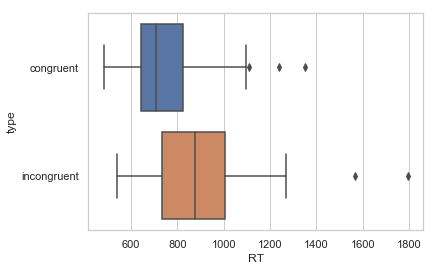

In [117]:
sns.boxplot(x="RT", y="type", data=con)

<b>two-sample t-test:</b> is er een significant verschil tussen de congruente en incongruente trials? 

In [148]:
ind_t_test = ttest_ind(congr_df["STR_mean_RT_congruent"],congr_df["STR_mean_RT_incongruent"])

Er is een significant verschil in RT tussen de congruente en incongruente trials. 

 <b>95% BI</b>: 

(1) bereken het gemiddelde verschil tussen de twee groepen: 

In [149]:
diff_mean = incon_mean - con_mean
diff_mean

143.05499999999995

The mean difference in reaction time between the two trials is 143 ms. 

(2) Wat is de Margin of error (MoE)? (= one side of the CI)

In [143]:
t_val = t.ppf([0.975], congr_df)
N1 = N2 = 40
std1 = congr_df["STR_mean_RT_congruent"].std()
std2 = congr_df["STR_mean_RT_incongruent"].std()
df = (N1+N2 - 2)
std_N1N2 = sqrt(((N1-1)*(std1)**1 + (N2-1)*(std2)**2)/df)

In [161]:
MoE = t.ppf(0.975, congr_df) *std_N1N2 + sqrt(1/N1 + 1/N2)
MoE

array([[2251.91580308,  348.08968853,  348.04464539],
       [ 762.7053845 ,  348.04064025,  347.95329441],
       [ 564.1913422 ,  348.12887485,  347.98487209],
       [ 492.24304978,  348.17839044,  348.1833171 ],
       [ 455.76160429,  348.0936779 ,  348.02466169],
       [ 433.84579605,  348.24666175,  348.18164068],
       [ 408.87525559,  348.15397621,  348.01167835],
       [ 401.1050451 ,  348.26762362,  348.17565671],
       [ 395.07659156,  347.93184105,  347.82130244],
       [ 390.264631  ,  348.03445523,  347.94696252],
       [ 386.33542756,  347.97358089,  347.93825027],
       [ 383.06689838,  348.27045159,  348.12752006],
       [ 380.30558628,  348.17390986,  348.02374832],
       [ 377.94208435,  348.09977071,  348.02142931],
       [ 375.89630515,  348.20906717,  348.06037206],
       [ 374.10828525,  348.16770907,  348.08266355],
       [ 372.53224349,  348.16195132,  348.06345486],
       [ 371.13262548,  348.20064168,  348.00808624],
       [ 369.88140103,  348.

In [156]:
print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1s} [{:3.1s} to {:3.1s}] (mean [95% CI])'.format(str(diff_mean), str(diff_mean - MoE), str(diff_mean + MoE)))

The results of the independent t-test are: 
	t-value = -2.886
	p-value = 0.005

The difference between groups is 1   [[   to [  ] (mean [95% CI])


The difference between groups is: 

In [157]:
diff_mean 

143.05499999999995

### Distributie van de congruentie-scores: gemiddelde verschil tussen incongruente en congruente trials. 
<ul>
<li><b>positieve waarde:</b> de gemiddelde RT in de incongruente trials is trager(langer) dan in de congruente trials. </li>
<li><b>negatieve waarde:</b> de gemiddelde RT in de incongruente trials is sneller(korter) dan in de incongruente trials.</li>
</ul>

#### Beschrijvende gegevens

In [162]:
df_STR[["STR_CE_RT"]].describe()

,STR_CE_RT
count,40.000000
mean,143.054437
std,99.632766
min,-5.250477
25%,81.290476
50%,130.600371
75%,187.719322
max,456.548498


laagste congruentie-score = -5.25 ms
hoogste congruentie-score = 465.55 ms

#### Histogram 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


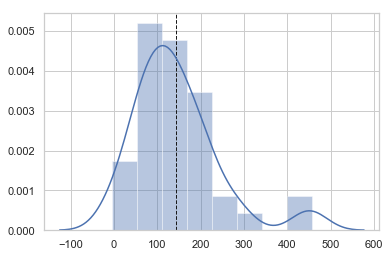

In [83]:
plt.axvline(CE_mean, color='k', linestyle='dashed', linewidth=1)
sns.distplot(a)

<ul>
    <b>Verdeling van de congruentie-scores:</b> 
<li> Gemiddelde ligt tussen 100 - 200 ms: 143.05 ms</li>
<li> Piek ligt tussen 75 - 150 ms. SD = 99.63 ms</li> <br>
Beide tonen dus aan dat er vooral positieve verschilscores zijn: incongruente trials > congruente trials. 
</ul>

##### Boxplot

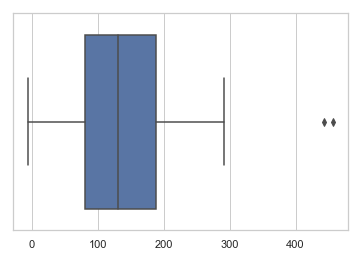

In [85]:
sns.set(style="whitegrid")
sns.boxplot(x=a)

Twee outliers tussen 400 en 500 ms. Dit is inderdaad een extreme switch cost. 

## Accuraatheid

##### dataset inlezen 

In [167]:
df_acc = df_STR[["STR_TOTACC_prop", "STR_ACC_prop_congr", "STR_ACC_prop_incongr", "STR_ACC_congrE"]]

##### Wat zijn de kenmerken van de vier geïmplementeerde kolommen? 

In [168]:
df_acc.describe()

,STR_TOTACC_prop,STR_ACC_prop_congr,STR_ACC_prop_incongr,STR_ACC_congrE
count,40.000000,40.000000,40.000000,40.000000
mean,0.959276,0.980008,0.938126,0.041882
std,0.037084,0.032821,0.060175,0.062360
min,0.870000,0.854167,0.764706,-0.107372
25%,0.930000,0.975078,0.900000,0.001200
50%,0.970000,1.000000,0.958759,0.020621
75%,0.990000,1.000000,0.980098,0.069679
max,1.000000,1.000000,1.000000,0.215686


Wanneer je de gemiddelden vergelijkt van congruent en incongruent; zie je dat de gemiddelde proportie lager ligt bij de incongruente trials (0.9381) dan bij de congruente trials (0.98)

##### interpretatie van de waarde van het congruentie-effect (congrE) in proportie: <br>
<ul>
<li><b>positieve waarde:</b> proportie correct congruent > proportie correct incongruent. ~ congruente trials waren eenvoudiger voor de participant. </li>
<li><b>negatieve waarde:</b> proportie correct congruent < proportie correct incongruent. ~ congruente trials waren moeilijker voor de participant.</li>
<li><b>0:</b> proportie correct congruent = proportie correct incongruent. ~ congruente trials waren even moeilijk als de incongruente voor de participant.</li>

##### Nagaan of van elke kolom de min en max binnen de berekende min en max ligt: [mean -+ 2SD]

In [170]:
tot_acc_mean = 0.959276
tot_acc_sd = 0.037084

In [171]:
max_tot = tot_acc_mean + 2 *tot_acc_sd
min_tot = tot_acc_mean - 2 *tot_acc_sd

In [172]:
max_tot

1.033444

In [173]:
min_tot

0.885108

De eigenlijke minimale waarde ligt onder de berekende minimale waarde (outliers?)

In [174]:
con_acc_mean = 0.98
con_acc_sd = 0.032821

In [175]:
max_con = con_acc_mean + 2 *con_acc_sd
min_con = con_acc_mean - 2 *con_acc_sd

In [177]:
max_con

1.045642

In [176]:
min_con

0.914358

De eigenlijke minimale waarde ligt onder de berekende minimale waarde (outliers?)

In [179]:
incon_acc_mean = 0.938126
incon_acc_sd = 0.060175

In [180]:
max_incon = incon_acc_mean + 2 *incon_acc_sd
min_incon = incon_acc_mean - 2 *incon_acc_sd

In [182]:
max_incon

1.058476

In [181]:
min_incon

0.8177760000000001

De eigenlijke minimale waarde ligt onder de berekende minimale waarde (outliers?)

In [183]:
CE_acc_mean = 0.041882
CE_acc_sd = 0.062360

In [184]:
max_CE = CE_acc_mean + 2 *CE_acc_sd
min_CE = CE_acc_mean - 2 *CE_acc_sd

In [185]:
max_CE

0.166602

De gevonden max CE is groter dan de "toelaten" max CE. 

In [186]:
min_CE

-0.082838

De gevonden min CE is negatiever dan de "toegelaten" min CE. 

### Verdeling van de vier kolommen visualiseren. 

In [188]:
x=df_STR[["STR_TOTACC_prop"]]
y=df_STR[["STR_ACC_prop_congr"]]
z=df_STR[["STR_ACC_prop_incongr"]]
a=df_STR[["STR_ACC_congrE"]]

#### TOT_prop

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



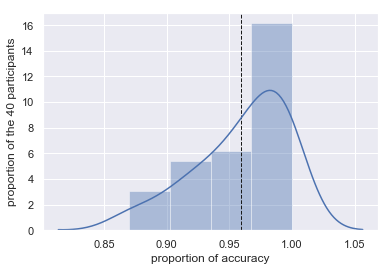

In [189]:
plt.axvline(tot_acc_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('proportion of accuracy')
sns.distplot(x)

##### boxplot

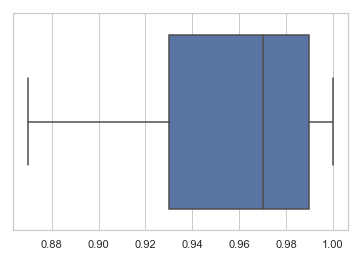

In [193]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x)

In [192]:
tot_acc_mean

0.959276

In [194]:
tot_acc_sd

0.037084

#### prop_congr

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



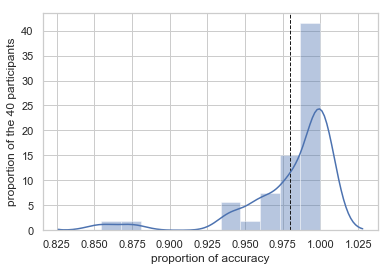

In [195]:
plt.axvline(con_acc_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('proportion of accuracy')
sns.distplot(y)

De verdeling van de proportie accuraatheid in de congruente trials is toch behoorlijk uitgespreid. 

##### boxplot

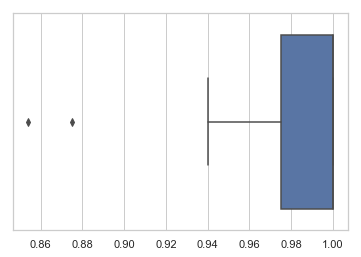

In [196]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=y)

Deze verdeling is zo sterk uitgespreid doordat er twee outliers zijn.<br>
Daarnaast zijn er gewoon heel veel mensen die 1.00 accuraatheidsproportie hebben. 

In [197]:
con_acc_mean


0.98

In [198]:
con_acc_sd

0.032821

#### prop_incongr

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



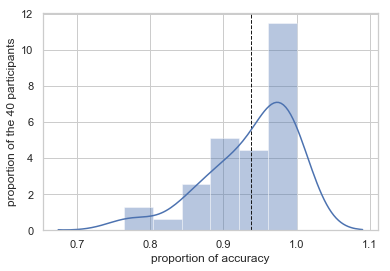

In [199]:
plt.axvline(incon_acc_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('proportion of accuracy')
sns.distplot(z)

##### boxplot

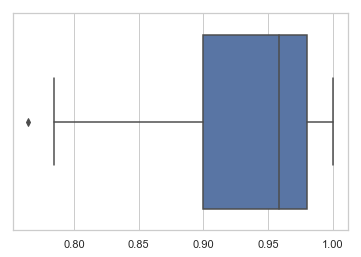

In [200]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=z)

In [ ]:
Er wordt outlier aangeduid. 

In [201]:
incon_acc_mean

0.938126

In [202]:
incon_acc_sd

0.060175

#### Prop_congr & incongr 

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



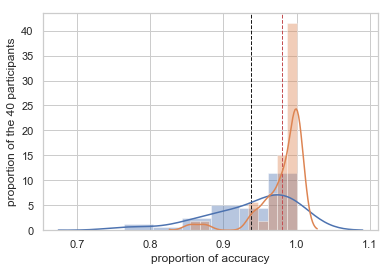

In [203]:
plt.axvline(incon_acc_mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(con_acc_mean, color='r', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 40 participants')
plt.xlabel('proportion of accuracy')
sns.distplot(z)
sns.distplot(y)

Dit toont dat de dat de verdeling van de accuraatheidsproportie veel minder hoog scoort en veel meer variërende waarden heeft in de incongruente (blauwe) trials, vergeleken met de congruente (oranje) trials. <br>
De verticale assen tonen ook aan dat de gemiddelde accuraatheidsproportie lager ligt voor de incongruente dan de congruente trials. 

##### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



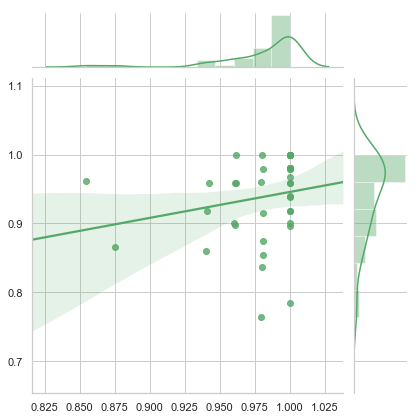

In [204]:
sns.jointplot(x=y, y=z, kind='reg', color='g')

##### correlatietest

In [206]:
linregress(df_STR["STR_ACC_prop_congr"], df_STR["STR_ACC_prop_incongr"])

LinregressResult(slope=0.37572985311582097, intercept=0.5699075886132562, rvalue=0.2049303467907281, pvalue=0.20461669588068782, stderr=0.2911127248355167)

In [ ]:
Deze correlatietest toont aan dat de positieve relatie tussen congruente en incongruente accuraatheidsproportie niet significant is (p = 0.20462 > 0.05). <br>
Dit betekent dus dat het niet sowieso betekent dat indien de proportie hoger is op de ene soort trials, dat dit ook zo zal zijn op de andere soort trials. 

##### boxplot

In [207]:
congr_prop_df = df_STR[["ppn","STR_ACC_prop_congr","STR_ACC_prop_incongr"]]

In [208]:
con_prop = congr_prop_df["STR_ACC_prop_congr"].append(congr_prop_df["STR_ACC_prop_incongr"])

In [209]:
con_prop = con_prop.to_frame()

In [215]:
con_prop.columns = ["ACC_prop"]

In [218]:
con_prop["ppn"] = [1,
2,
3,
4,
5,
6,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
31,
32,
33,
34,
35,
36,
38,
39,
40,
41,
42,
43,
1,
2,
3,
4,
5,
6,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
31,
32,
33,
34,
35,
36,
38,
39,
40,
41,
42,
43]

con_prop["type"] =  ["congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent",
               "congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent",
               "congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent",
               "congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent","congruent",
               "incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent",
               "incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent",
               "incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent",
               "incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent","incongruent"]

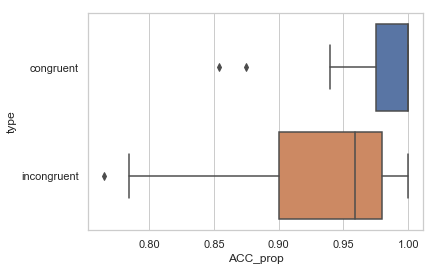

In [219]:
sns.boxplot(x="ACC_prop", y="type", data=con_prop)

Terwijl de proportie-accuraatheid bij de congruente trials gaat aanleunen tegen de bovengrens, is er toch al heel wat meer variatie te vinden bij in de proportie-accuraatheid in de incongruente trials. 

Het verschil in gemiddelde tussen deze twee types trials?


In [222]:
diff_prop_mean = incon_acc_mean - con_acc_mean
diff_prop_mean

-0.04187399999999997

Is dit verschil voldoende groot om te kunnen zeggen dat het verschil in accuraatheidsproportie tussen congruente en incongruente trails significant is? 

##### t-test

In [224]:
ttest_ind(df_STR["STR_ACC_prop_congr"],df_STR["STR_ACC_prop_incongr"])

Ttest_indResult(statistic=3.8644698072760453, pvalue=0.00022883077912846958)

t = 3.86447, p = 0.00022883; er is een significant verschil in gemiddelde accuraatheidsproportie tussen congruente en incongruente trials. 

#### congrE

In [226]:
df_STR[["STR_ACC_congrE"]].describe()

,STR_ACC_congrE
count,40.000000
mean,0.041882
std,0.062360
min,-0.107372
25%,0.001200
50%,0.020621
75%,0.069679
max,0.215686


Gemiddeld is er een verschil van 0.041882 (SD = 0.062360) in proportie correctheid tussen congruente en incongruente trials (de correctheid ligt hoger bij de congruente dan de incongruente). <br>
De minimale gevonden verschil is -0.107372, wat aangeeft dat de proportie accuraatheid in de incongruente trials voor deze participant groter was dan voor de congruente trials. <br>
Het maximale gevonden verschil is 0.215686. Dit is het maximale gevonden verschil in accuraatheid tussen de congruente en incongruente trials, waarbij de incongruente minder accuraat waren. 

##### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



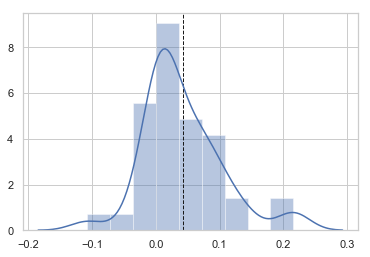

In [229]:
plt.axvline(CE_acc_mean, color='k', linestyle='dashed', linewidth=1)
sns.distplot(a)

##### boxplot

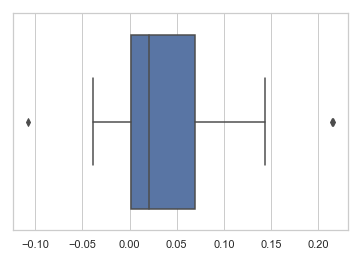

In [230]:
sns.set(style="whitegrid")
sns.boxplot(x=a)

Toont dat de minimale en maximale waarde outliers zijn. 

### Verband CE_RT & CE_ACC

In [234]:
df_STR[["STR_CE_RT","STR_ACC_congrE"]].describe()

,STR_CE_RT,STR_ACC_congrE
count,40.000000,40.000000
mean,143.054437,0.041882
std,99.632766,0.062360
min,-5.250477,-0.107372
25%,81.290476,0.001200
50%,130.600371,0.020621
75%,187.719322,0.069679
max,456.548498,0.215686


Beide gemiddeldes een <b>positief verschil:</b> algemeen betekent dit incongruente trials "slechter" (trager en minder accuraat) dan congruente trials. 

##### joint plot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



AttributeError: module 'matplotlib.pyplot' has no attribute 'ayvline'

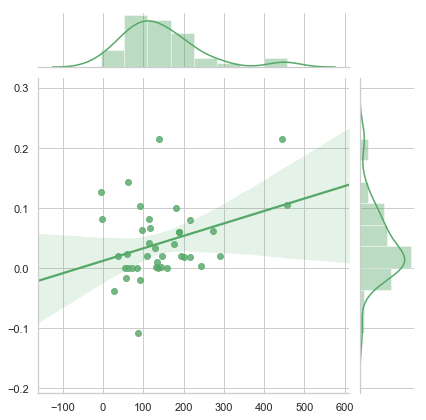

In [237]:
sns.jointplot(x=df_STR[["STR_CE_RT"]], y=df_STR[["STR_ACC_congrE"]], kind='reg', color='g')


##### correlatietest

In [239]:
linregress(df_STR["STR_CE_RT"], df_STR["STR_ACC_congrE"])

LinregressResult(slope=0.00020736938498938082, intercept=0.012216913696232599, rvalue=0.33131457129294956, pvalue=0.03676529325327266, stderr=9.579957384743529e-05)

Er wordt een positieve relatie gevonden (r = 0.3313) (p = 0.0367 < 0.05). Dit toont aan dat wanneer een participant een grotere kost heeft in RT tussen congruente en incongruente trials, zal er ook een grotere kost zijn in accuraatheid. 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



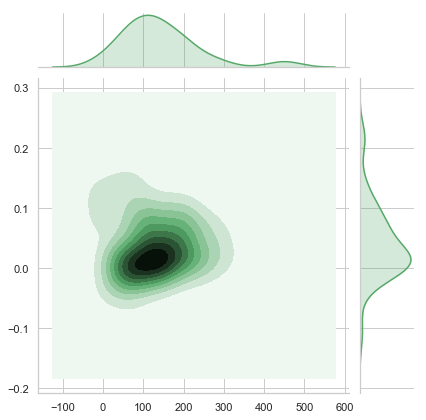

In [238]:
sns.jointplot(x=df_STR[["STR_CE_RT"]], y=df_STR[["STR_ACC_congrE"]], kind='kde', color='g')

# Visual reaction taak 

Wat hield deze taak in? 
<ul>
    <li>Gekeken naar de RT, niet de accuraatheid</li>
    <li>Locatie van de bol was steeds zelfde straal van het middenpunt, dus hoeft niet echt in rekening gebracht te worden</li>
    <li>22 verschillende intervallen: variërende duurtijd tussen fixatiekruis en bol => wat is de reactietijd?</li>
    
</ul>

In [232]:
df_VR = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/ppndata/CLEAN VR/VR_original.xlsx')

## Reactietijden

## algemeen: interval niet in rekening gebracht.

In [241]:
df_VR_TOT = df_VR[["VR_mean_RT_TOT"]]

### Kenmerken van de gemiddelde reactietijd van de participanten over alle intervallen heen. 

In [242]:
df_VR_TOT.describe()

,VR_mean_RT_TOT
count,39.000000
mean,839.668166
std,102.508407
min,684.917625
25%,777.302034
50%,813.660468
75%,867.365823
max,1227.274000


Uitval: van de eerste participant waar dit experiment werd afgenomen, kon de data niet opgeslagen worden. Daarom 1 participant uitval. <br>
Gemiddeld duurde het 839.668 ms (SD = 102.51 ms) tot een participant op een bol klikte die verscheen. De snelste gemiddelde reactietijd is gelijk aan 684.918 ms. De traagste gemiddelde reactietijd is gelijk aan 1227.274 ms. 

In [243]:
RT_TOT_mean = 839.668166

In [247]:
x = df_VR_TOT[["VR_mean_RT_TOT"]]
x

,VR_mean_RT_TOT
0,810.042043
1,806.951244
2,797.451652
3,866.320667
4,957.750167
5,867.013375
6,684.917625
7,867.718271
8,765.978500
9,1227.274000


NaN waarde in de tabel: zal daardoor niet eenvoudig kunnen visualiseren => deze dus weglaten. 

In [248]:
df_VR_TOT["VR_mean_RT_TOT"] = pd.to_numeric(df_VR_TOT["VR_mean_RT_TOT"], errors='coerce')
df_VR_TOT = df_VR_TOT.dropna(subset=["VR_mean_RT_TOT"])
df_VR_TOT["VR_mean_RT_TOT"] = df_VR_TOT["VR_mean_RT_TOT"].astype(int)
x = df_VR_TOT["VR_mean_RT_TOT"]

### histogram

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



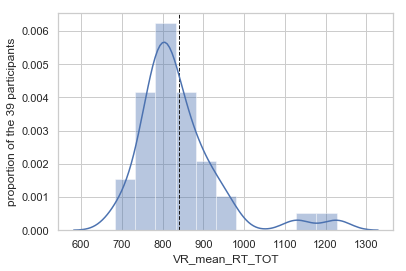

In [249]:
plt.axvline(RT_TOT_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('proportion of the 39 participants')
plt.xlabel('Mean reaction time in ms')
sns.distplot(x)

Toont dat er wat outliers zijn aan de bovenzijde. 

### boxplot

Via het boxplot kan het duidelijk worden hoeveel outliers er zijn. 

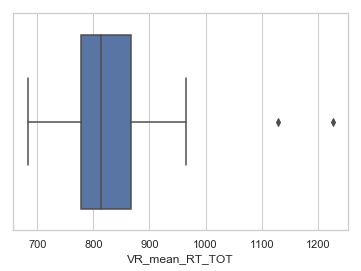

In [250]:
import seaborn as sns
sns.set(style="whitegrid")
sns.boxplot(x=x)

Er zijn dus twee outliers. 

## Het interval wordt nu wel in rekening gebracht

Eerst specifiek kijken naar elke kolom: wat zijn de kenmerken? 

In [258]:
df_VR.ix[:,"VR_mean_RT_TOT":].describe()

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,VR_mean_RT_TOT,mean_RT_INT_500ms,mean_RT_INT_750ms,mean_RT_INT_1000ms,mean_RT_INT_1250ms,mean_RT_INT_1500ms,mean_RT_INT_1750ms,mean_RT_INT_2000ms,mean_RT_INT_2250ms,mean_RT_INT_2500ms,...,mean_RT_INT_5000ms,mean_RT_INT_7500ms,mean_RT_INT_10000ms,mean_RT_INT_12500ms,mean_RT_INT_15000ms,mean_RT_INT_17500ms,mean_RT_INT_20000ms,mean_RT_INT_22500ms,mean_RT_INT_25000ms,mean_RT_INT_27500ms
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,839.668166,862.497459,830.516667,779.502252,781.318504,815.269256,839.873799,817.307474,791.280488,864.295808,...,821.387735,823.431850,878.041547,923.985611,850.288051,859.965722,852.537718,941.364692,871.857714,917.867068
std,102.508407,155.702691,126.656746,169.863427,130.367675,131.978448,139.949768,108.637500,126.871056,144.752758,...,154.232085,122.455188,171.931745,162.996542,130.416219,142.112402,130.445987,156.831739,166.013025,167.078210
min,684.917625,596.259000,640.025000,559.481000,556.059500,615.281500,548.956000,575.198500,523.797333,628.685333,...,580.179667,608.517000,638.947333,708.796000,486.170000,624.660500,648.087500,727.612000,594.289000,704.351000
25%,777.302034,777.722583,739.461250,686.807250,701.497667,713.645750,730.821250,749.473750,713.484000,760.378333,...,713.901500,759.811000,755.006750,823.822000,782.964250,766.116250,780.306667,839.337000,778.808417,819.562000
50%,813.660468,834.831333,819.622500,749.164000,761.540000,796.185000,860.861500,802.101000,767.072667,849.166500,...,789.662000,810.570000,820.169000,866.610000,845.471500,842.637000,816.336000,933.464000,839.333000,877.003667
75%,867.365823,931.969125,898.288500,806.978417,826.842000,895.478750,922.190333,896.771833,847.415500,966.953750,...,876.935000,873.071000,946.106500,979.348250,931.033917,918.408833,924.337000,1026.897000,945.769583,963.587000
max,1227.274000,1532.708000,1346.341500,1445.964500,1287.744500,1305.478000,1274.335000,1096.798500,1251.827000,1239.033500,...,1276.663667,1211.762000,1377.270500,1497.419000,1071.855000,1297.186500,1284.941000,1446.628000,1486.380000,1501.718500


Is er een significant verschil tussen de gemiddelde reactietijden afhankelijk van de verschillende niveaus (intervallen)?

#### Boxplot met een boxplot per interval (long format nodig)

In [ ]:
Nodige kolommen: (1) ppn, (2) mean_RT, (3) interval

In [260]:
VR_long = pd.melt(df_VR, id_vars=["ppn"], var_name="mean_RT", value_name = "interval")
VR_long

,ppn,mean_RT,interval
0,1,Geslacht,V
1,2,Geslacht,M
2,3,Geslacht,M
3,4,Geslacht,M
4,5,Geslacht,M
5,6,Geslacht,V
6,8,Geslacht,V
7,9,Geslacht,V
8,10,Geslacht,M
9,11,Geslacht,V


Dit is nu gewoon met alle karakteristieken gedaan. Daarom moet er nog een deel van de rijen weggedaan worden. <br>
Je kan dit nu dus even checken via Excel. 

In [261]:
VR_long.to_excel("vr_long.xlsx")

Dit is aangepast. 

In [262]:
df_VR_long = pd.read_excel("C:/Users/beheerder/vr_long.xlsx")


Nu nog de ontbrekende waarden uit zuiveren zodat we dan een boxplot kunnen maken. 

In [265]:
df_VR_long["interval"] = pd.to_numeric(df_VR_long["interval"], errors='coerce')
df_VR_long = df_VR_long.dropna(subset=["interval"])
df_VR_long["interval"] = df_VR_long["interval"].astype(int)
x = df_VR_long["interval"]

In [268]:
df_VR_long.columns = ["ppn", "interval", "mean_RT"]

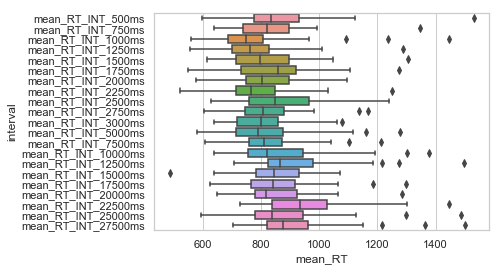

In [270]:
sns.boxplot(x="mean_RT", y="interval", data=df_VR_long)

Belangrijk: evenveel trials per interval? 

seaborn pointplot: 
    *hue: category multitasking (high and low) => twee plots

In [225]:
data = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/universiteit.xlsx")

In [ ]:
Bedoeling: twee grafieken: multitasking preference = [laag, gemiddeld, hoog]

In [235]:
MT_VR = data[["ppn", "MT","mean_RT_INT_500ms","mean_RT_INT_750ms","mean_RT_INT_1000ms","mean_RT_INT_1250ms","mean_RT_INT_1500ms",
"mean_RT_INT_1750ms","mean_RT_INT_2000ms","mean_RT_INT_2250ms","mean_RT_INT_2500ms","mean_RT_INT_2750ms","mean_RT_INT_3000ms",
"mean_RT_INT_5000ms","mean_RT_INT_7500ms","mean_RT_INT_10000ms","mean_RT_INT_12500ms","mean_RT_INT_15000ms","mean_RT_INT_17500ms",
"mean_RT_INT_20000ms","mean_RT_INT_22500ms","mean_RT_INT_25000ms","mean_RT_INT_27500ms"]]

##### Stap 1: verdelen in 3 categorieën afhankelijk van voorkeur voor multitasking. 

In [236]:
meanMT = 48.925
minMT = 24
maxMT = 74

In [237]:
ondergrens1 = minMT-4
ondergrens2 = meanMT 
bovengrens3 = maxMT+6

In [238]:
binsMT = [ondergrens1, ondergrens2, bovengrens3]
namesMT = ["geen voorkeur om te multitasken", "voorkeur om te multitasken"]

In [240]:
MT_VR["MT_cat"] = pd.cut(MT_VR["MT"], binsMT, labels=namesMT)
MT_VR.to_excel("MT_VR.xlsx")

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [248]:
list(MT_VR)

['ppn',
 'MT',
 'mean_RT_INT_500ms',
 'mean_RT_INT_750ms',
 'mean_RT_INT_1000ms',
 'mean_RT_INT_1250ms',
 'mean_RT_INT_1500ms',
 'mean_RT_INT_1750ms',
 'mean_RT_INT_2000ms',
 'mean_RT_INT_2250ms',
 'mean_RT_INT_2500ms',
 'mean_RT_INT_2750ms',
 'mean_RT_INT_3000ms',
 'mean_RT_INT_5000ms',
 'mean_RT_INT_7500ms',
 'mean_RT_INT_10000ms',
 'mean_RT_INT_12500ms',
 'mean_RT_INT_15000ms',
 'mean_RT_INT_17500ms',
 'mean_RT_INT_20000ms',
 'mean_RT_INT_22500ms',
 'mean_RT_INT_25000ms',
 'mean_RT_INT_27500ms',
 'MT_cat']

##### Stap 2: in long format 

In [249]:
MT_VR_long = pd.melt(MT_VR, id_vars=["ppn", "MT_cat","MT"], var_name="interval", value_name = "mean_RT")

In [250]:
MT_VR_long

,ppn,MT_cat,MT,interval,mean_RT
0,1,geen voorkeur om te multitasken,30,mean_RT_INT_500ms,793.319000
1,2,geen voorkeur om te multitasken,34,mean_RT_INT_500ms,841.925333
2,3,geen voorkeur om te multitasken,31,mean_RT_INT_500ms,1019.798000
3,4,voorkeur om te multitasken,59,mean_RT_INT_500ms,933.130000
4,5,geen voorkeur om te multitasken,33,mean_RT_INT_500ms,791.282000
5,6,geen voorkeur om te multitasken,45,mean_RT_INT_500ms,836.918000
6,8,geen voorkeur om te multitasken,24,mean_RT_INT_500ms,596.259000
7,9,geen voorkeur om te multitasken,43,mean_RT_INT_500ms,860.962000
8,10,voorkeur om te multitasken,67,mean_RT_INT_500ms,774.457500
9,11,geen voorkeur om te multitasken,29,mean_RT_INT_500ms,1532.708000


##### Stap 3: de ontbrekende waarden uitzuiveren. 

In [257]:
MT_VR_long["mean_RT"] = pd.to_numeric(MT_VR_long["mean_RT"], errors='coerce')
MT_VR_long = MT_VR_long.dropna(subset=["mean_RT"])
MT_VR_long["mean_RT"] = MT_VR_long["mean_RT"].astype(float)

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
Stap 4: 2 datasets obv multitasking

In [261]:
GV_MT_VR_long = MT_VR_long[MT_VR_long["MT_cat"] == "geen voorkeur om te multitasken"]
V_MT_VR_long = MT_VR_long[MT_VR_long["MT_cat"] == "voorkeur om te multitasken"]

##### Stap 5: boxplot visualiseren 

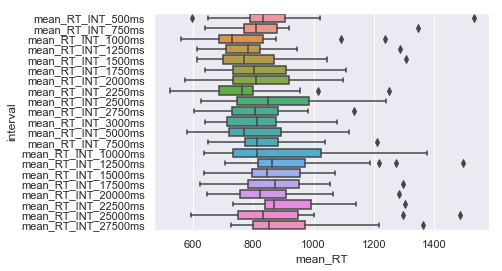

In [262]:
sns.boxplot(x="mean_RT", y="interval",  data=GV_MT_VR_long)

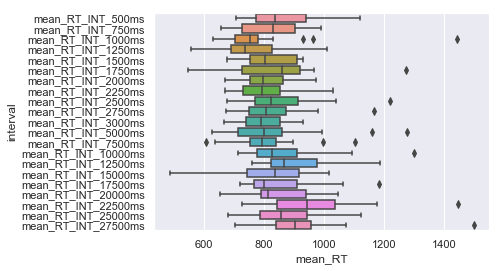

In [263]:
sns.boxplot(x="mean_RT", y="interval",  data=V_MT_VR_long)

interpretatie: in het algemeen ziet het er naaruit dat men eerst wat trager zal reageren indien de bol heel snel verschijnt (schrikken), vanaf 1000 ms als interval kunnen ze hier snel op reageren (< 800 ms). <br>
Zodra het wat langer duurt bvb. vanaf 10 000  ms duurt het < 800 ms om te reageren. 

#### nota: dimensie extra met smartphone multitasking measure. 
Slope per participant: dus wie groter slope heeft, vertraagd meer door het groter interval. 

In [ ]:
Als multitasking waarde voor de participanten moet je dus eigenlijk, per participant die slope verkrijgen.  

#### ANOVA test

= generalization of the t-tests to more than 2 groups. 
H0: equal means in the populations from which the groups of data were sampled. 

interpretatie: http://connor-johnson.com/2014/02/18/linear-regression-with-python/

In [280]:
results = ols('mean_RT ~ C(interval)', data=df_VR_long).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mean_RT   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.839
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           3.80e-08
Time:                        15:12:17   Log-Likelihood:                -5212.2
No. Observations:                 819   AIC:                         1.047e+04
Df Residuals:                     798   BIC:                         1.057e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            877.4872     22.792     38.499      0.000     832.747     922.227
C(interval)[T.mean_RT_INT_1000ms]    -98.4872     32.233     -3.055      0.002    -161.759     -35.215
C(interval)[T.mean_RT_INT_12500ms]    45.9744     32.233      1.426      0.154     -17.297     109.246
C(interval)[T.mean_RT_INT_1250ms]    -96.6667     32.233     -2.999      0.003    -159.938     -33.395
C(interval)[T.mean_RT_INT_15000ms]   -27.6667     32.233     -0.858      0.391     -90.938      35.605
C(interval)[T.mean_RT_INT_1500ms]    -62.6410     32.233     -1.943      0.052    -125.913       0.631
C(interval)[T.mean_RT_INT_17500ms]   -17.9744     32.233     -0.558      0.577     -81.246      45.297
C(interval)[T.mean_RT_INT_1750ms]    -38.1282     32.233     -1.183      0.237    -101.400      25.144
C(interval)[T.mean_RT_INT_20000ms]   -25.4359     32.233     -0.789      0.430     -88.708      37.836
C(interval)[T.mean_RT_INT_2000ms]    -60.6410     32.233     -1.881      0.060    -123.913       2.631
C(interval)[T.mean_RT_INT_22500ms]    63.4103     32.233      1.967      0.050       0.138     126.682
C(interval)[T.mean_RT_INT_2250ms]    -86.7692     32.233     -2.692      0.007    -150.041     -23.497
C(interval)[T.mean_RT_INT_25000ms]    -6.1282     32.233     -0.190      0.849     -69.400      57.144
C(interval)[T.mean_RT_INT_2500ms]    -13.7436     32.233     -0.426      0.670     -77.015      49.528
C(interval)[T.mean_RT_INT_27500ms]    39.7692     32.233      1.234      0.218     -23.503     103.041
C(interval)[T.mean_RT_INT_2750ms]    -55.4359     32.233     -1.720      0.086    -118.708       7.836
C(interval)[T.mean_RT_INT_3000ms]    -73.3333     32.233     -2.275      0.023    -136.605     -10.062
C(interval)[T.mean_RT_INT_5000ms]    -56.5897     32.233     -1.756      0.080    -119.862       6.682
C(interval)[T.mean_RT_INT_500ms]     -15.5641     32.233     -0.483      0.629     -78.836      47.708
C(interval)[T.mean_RT_INT_7500ms]    -54.5897     32.233     -1.694      0.091    -117.862       8.682
C(interval)[T.mean_RT_INT_750ms]     -47.4872     32.233     -1.473      0.141    -110.759      15.785
==============================================================================
Omnibus:                      210.621   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.278
Skew:                           1.314   Prob(JB):                    1.96e-120
Kurtosis:                       6.041   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R² is laag: dit kan misschien verklaard worden door het feit dat je eigenlijk geen rechte ziet in de verdeling; maar eerder een een dal in de gemiddelde RT bij een niet té korte/niet té lang interval.  

Op basis van de F-statistiek van de ANOVA blijkt er wel een significant verschil in gemiddelde RT te zijn tussen de verschillende intervallen. 

De onderstaande T-vergelijkingen maken de vergelijkingen met een bepaalde standaard. 

# De waarden van de 3 taken met elkaar vergelijken: correlatiematrix

## <b>interessante waarden per taak: <b>

<b>TST:</b> <br>
<li>prop_RT_SC: RT_M / RT_NM</li>
<li>TST_SC_RT_M: RT_S -  RT_NS </li>
<li>prop_SC_prop: prop_M/prop_NM </li>
<li>TST_M_ACC_switchE: prop_S -  prop_NS </li>  

<b>Stroop:</b> <br>
<li>STR_CE_RT: str_incon - str_con</li>
<li>STR_ACC_congrE: prop_con -  prop_incon</li>


<b>TST:</b> <br>
<li>VR_mean_RT_TOT</li>


In [206]:
taken = pd.read_excel("D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/experiment verloop/universiteit.xlsx")

In [272]:
corrmat = taken[["Prop_RT_SC", "prop_SC_prop", "STR_CE_RT", "STR_ACC_congrE", "VR_mean_RT_TOT"]]
corrmat.to_excel("corrmat.xlsx")

In [267]:
np.corrcoef(corrmat)

array([[1.        , 0.98910561, 0.97541658, ..., 0.99924201, 0.92925664,
        0.99641991],
       [0.98910561, 1.        , 0.99723   , ..., 0.99408632, 0.97351654,
        0.99800947],
       [0.97541658, 0.99723   , 1.        , ..., 0.98325562, 0.98782429,
        0.99055462],
       ...,
       [0.99924201, 0.99408632, 0.98325562, ..., 1.        , 0.9429334 ,
        0.99895547],
       [0.92925664, 0.97351654, 0.98782429, ..., 0.9429334 , 1.        ,
        0.95716213],
       [0.99641991, 0.99800947, 0.99055462, ..., 0.99895547, 0.95716213,
        1.        ]])

In [271]:
corr = corrmat.corr()
corr.to_excel("corrtaken.xlsx")

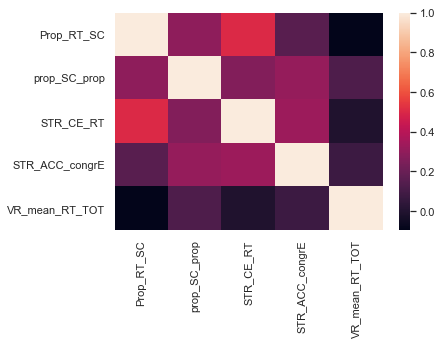

In [269]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [216]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Prop_RT_SC,TST_SC_RT_M,prop_SC_prop,TST_M_ACC_switchE,STR_CE_RT,STR_ACC_congrE,VR_mean_RT_TOT
Prop_RT_SC,1,-0.081,0.3,-0.079,0.51,0.15,-0.096
TST_SC_RT_M,-0.081,1,0.32,-0.16,0.074,0.18,0.33
prop_SC_prop,0.3,0.32,1,-0.2,0.27,0.31,0.13
TST_M_ACC_switchE,-0.079,-0.16,-0.2,1,-0.22,-0.21,-0.25
STR_CE_RT,0.51,0.074,0.27,-0.22,1,0.33,-0.0021
STR_ACC_congrE,0.15,0.18,0.31,-0.21,0.33,1,0.078
VR_mean_RT_TOT,-0.096,0.33,0.13,-0.25,-0.0021,0.078,1


significantie?

##### Significantiematrix met R

In [273]:
##### P
               X__1   Prop_RT_SC   prop_SC_prop STR_CE_RT    STR_ACC_congrE  VR_mean_RT_TOT
X__1                  0.2457       0.0543       0.6885       0.8155           0.8317        
Prop_RT_SC     0.2457              0.0639    <b>0.0009</b>   0.3451           0.5606        
prop_SC_prop   0.0543 0.0639                    0.0967       0.0504           0.4320        
STR_CE_RT      0.6885 0.0009       0.0967                    0.0368           0.9897        
STR_ACC_congrE 0.8155 0.3451       0.0504       0.0368                        0.6365        
VR_mean_RT_TOT 0.8317 0.5606       0.4320       0.9897       0.6365    

IndentationError: unexpected indent (<ipython-input-273-bfbe9d0161d9>, line 2)